In [14]:
from linares_plot import *
import statsmodels.formula.api as smf
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from scipy.stats import norm


In [230]:
df = pd.read_excel('simulations_wnoise.xlsx')

In [55]:
df = pd.read_excel('C:\\Users\\David\\Desktop\\noise_500.xlsx')

In [56]:
df

bias  kappas_E  kappas_I  separation  success
0        3.061489       300        30  180.000000     True
1       -0.160465       300        30  120.000000     True
4       -4.602758       300        30   60.000000     True
5       -1.480990       300        30   51.428571     True
6       -3.772516       300        30   45.000000     True
13     -14.395897       300        30   24.000000     True
14     -13.015984       300        30   22.500000     True
15     -12.889956       300        30   21.176471     True
16     -32.470674       300        30   20.000000     True
17       3.670094       300        30   18.947368     True
19       9.896550       300        30   17.142857     True
20       5.243680       300        30   16.363636     True
21       4.668833       300        30   14.400000     True
22      15.346383       300        30   13.333333     True
23       7.972553       300        30   12.000000     True
24       1.182754       300        30   11.612903     True
25       4.485472       300        30  180.000000     True
26      -1.461267       300        30  120.000000     True
29       3.410163       300        30   60.000000     True
30      29.882686       300        30   51.428571     True
31      -0.474480       300        30   45.000000     True
36     -10.143168       300        30   27.692308     True
40     -12.487970       300        30   21.176471     True
42      12.522535       300        30   18.947368     True
44       9.508072       300        30   17.142857     True
45       2.956383       300        30   16.363636     True
47       6.162012       300        30   13.333333     True
48       2.630697       300        30   12.000000     True
49      10.842366       300        30   11.612903     True
52       0.131342       300        30   90.000000     True
...           ...       ...       ...         ...      ...
24945 -166.011800       225        15   16.363636     True
24946    4.729643       225        15   14.400000     True
24947    6.638458       225        15   13.333333     True
24948    4.782734       225        15   12.000000     True
24949   -0.982325       225        15   11.612903     True
24950    0.785043       225        15  180.000000     True
24955   -9.572207       225        15   51.428571     True
24961  -22.860450       225        15   27.692308     True
24964    6.564858       225        15   22.500000     True
24965 -346.954262       225        15   21.176471     True
24966    6.311570       225        15   20.000000     True
24968   12.428770       225        15   18.000000     True
24969 -174.589882       225        15   17.142857     True
24970    4.759257       225        15   16.363636     True
24971    3.333890       225        15   14.400000     True
24972   -0.547335       225        15   13.333333     True
24973    8.442890       225        15   12.000000     True
24974    2.290530       225        15   11.612903     True
24978   -3.335378       225        15   72.000000     True
24983  -15.690436       225        15   36.000000     True
24984  -17.417557       225        15   32.727273     True
24987  -20.517512       225        15   25.714286     True
24988   11.348606       225        15   24.000000     True
24990    3.810243       225        15   21.176471     True
24992   12.226767       225        15   18.947368     True
24994   16.575333       225        15   17.142857     True
24996    0.389744       225        15   14.400000     True
24997    0.207917       225        15   13.333333     True
24998    9.785184       225        15   12.000000     True
24999   10.281343       225        15   11.612903     True

[13328 rows x 5 columns]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


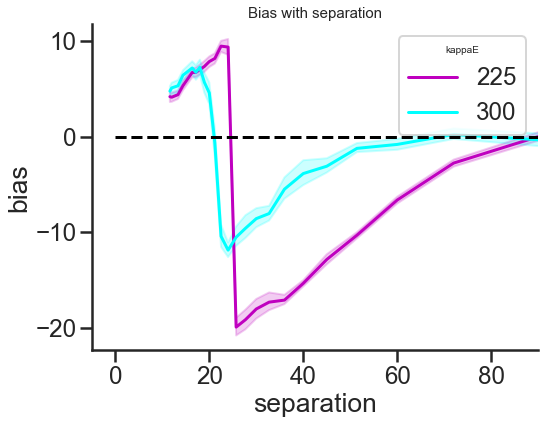

In [57]:
plt.figure(figsize=(8,6))
df = df[abs(df.bias)<1.5*np.std(df.bias)]

g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
#plt.xlim(20, 30)
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


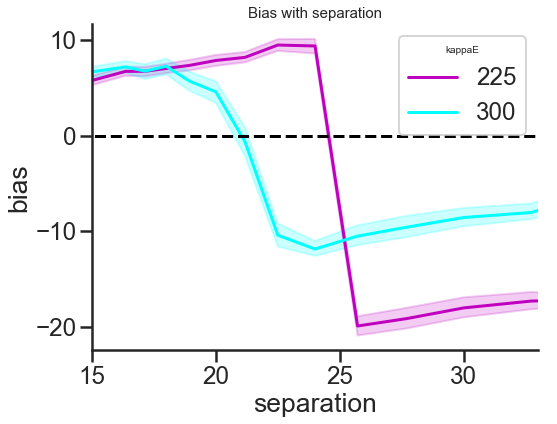

In [71]:
plt.figure(figsize=(8,6))
#df = df[abs(df.bias)<1.5*np.std(df.bias)]
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
#plt.xlim(-5, 90)
plt.xlim(15, 33)
plt.show(block=False)

In [26]:
df['separation'].unique()

array([180.        , 120.        ,  60.        ,  51.42857143,
        45.        ,  24.        ,  22.5       ,  21.17647059,
        20.        ,  18.94736842,  17.14285714,  16.36363636,
        14.4       ,  13.33333333,  12.        ,  11.61290323,
        27.69230769,  90.        ,  40.        ,  25.71428571,
        18.        ,  30.        ,  72.        ,  32.72727273,
        36.        ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"


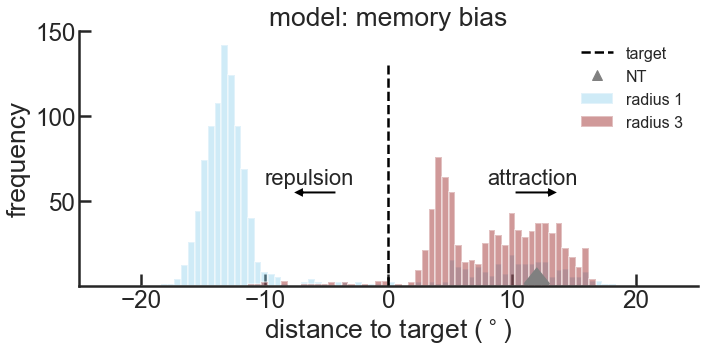

In [68]:

values_300_window = df.loc[(df['separation']>21) & (df['separation']<27) & (df['kappas_E']==300) , 'bias'].values
values_300_window = values_300_window[abs(values_300_window)<1.5*np.std(values_300_window)]
values_225_window = df.loc[(df['separation']>21) & (df['separation']<27) & (df['kappas_E']==225) , 'bias'].values
values_225_window = values_225_window[abs(values_225_window)<1.5*np.std(values_225_window)]

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)

sns.distplot(values_300_window, bins=np.linspace(-20,20,75),  kde=False,
             fit_kws={"color":"skyblue", 'linewidth':2}, label='radius 1', color='skyblue')

sns.distplot(values_225_window, bins=np.linspace(-20,20,75),  kde=False, 
             fit_kws={"color":"darkred", 'linewidth':2}, label='radius 3', color='darkred')


plt.plot([0, 0], [0,130], 'k--', linewidth=2.5, label='target');
plt.xlim(-25,25)
plt.plot((700), "^", color='grey', markersize=10, label='NT');

#plt.yticks([0.1,0.2])


##triangulo locura

l = plt.legend(loc='best', frameon=False, prop={'size': 16})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.text(8, 60, 'attraction', fontsize=22);
plt.text(-10, 60, 'repulsion', fontsize=22);
#plt.title(r'12$\circ$: Delay3 - Delay0')
plt.yticks([0.1,0.2, 0.3, 0.4])
plt.yticks([50,100,150])


plt.title('model: memory bias')
plt.annotate('', xy=(-8, 55),  xytext=(-4, 55),  arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom');

plt.annotate('', xy=(14, 55), xytext=(10, 55), arrowprops=dict(facecolor='black', shrink=0.05),
           horizontalalignment='left', verticalalignment='bottom');




pts = [(11, 1), (12, 10), (13, 1)]
triangle = plt.Polygon(pts, color='grey', fill=True, edgecolor='grey')
ax.add_patch(triangle)


plt.ylim(0,150);
#plt.ylim(0,1);
plt.tight_layout()


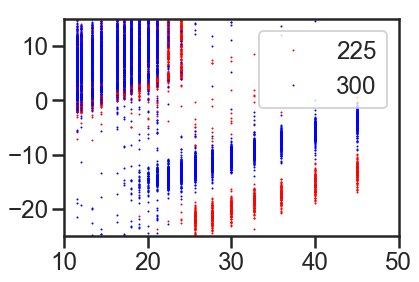

In [52]:
plt.plot( df.loc[df['kappas_E']==225, 'separation'], df.loc[df['kappas_E']==225, 'bias'], 'ro' , markersize=1, label='225')

plt.plot( df.loc[df['kappas_E']==300, 'separation'], df.loc[df['kappas_E']==300, 'bias'], 'bo', markersize=1, label='300' )
plt.xlim(10,50)
plt.ylim(-25,15)
plt.legend()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


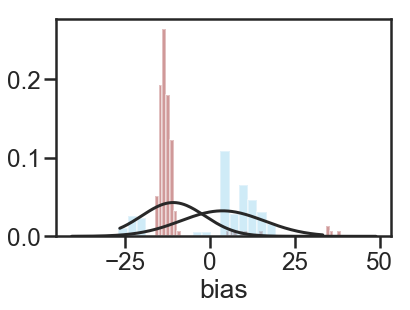

In [218]:
from scipy.stats import norm

sns.distplot(df.loc[(df['separation']>22) & (df['separation']<26) & (df['kappas_E']==300) , 'bias'], kde=False, fit=norm, color='darkred')
sns.distplot(df.loc[(df['separation']>22) & (df['separation']<26) & (df['kappas_E']==225) , 'bias'], kde=False, fit=norm, color='skyblue')
#plt.xlim(-20,20)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


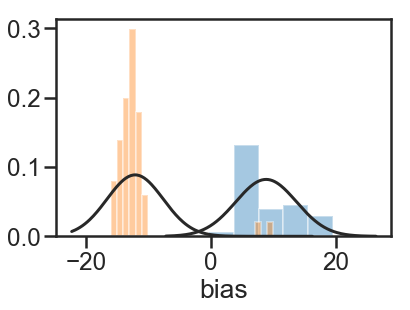

In [211]:
plt.figure()
sns.distplot(df.loc[(df['separation']>23) & (df['separation']<25) & (df['kappas_E']==225) & (df['bias']>-10) & (df['bias']<30), 'bias'], kde=False, fit=norm)
sns.distplot(df.loc[(df['separation']>23) & (df['separation']<25) & (df['kappas_E']==300) & (df['bias']>-30)  & (df['bias']<30), 'bias'], kde=False, fit=norm)
plt.show()

In [26]:
file = open('C:\\Users\\David\\Desktop\\The Beast.txt', 'r')

book = file.read()


def tokenize():
    if book is not None:
        words = book.lower().split()
        return words
    else:
        return None


def count_word(tokens, token):
    count = 0

    for element in tokens:
        # Remove Punctuation
        word = element.replace(",","")
        word = word.replace(".","")

        # Found Word?
        if word == token:
            count += 1
    return count
    
    
# Tokenize the Book
words = tokenize()

# Get Word Count
word = 'day'
frequency = count_word(words, word)
print('Word: [' + word + '] Frequency: ' + str(frequency))


Word: [day] Frequency: 1


In [64]:
book

"The horrible conclusion which had been gradually intruding itself upon my confused and reluctant mind was now an awful certainty. I was lost, completely, hopelessly lost in the vast and labyrinthine recess of the Mammoth Cave. Turn as I might, in no direction could my straining vision seize on any object capable of serving as a guidepost to set me on the outward path. That nevermore should I behold the blessed light of day, or scan the pleasant bills and dales of the beautiful world outside, my reason could no longer entertain the slightest unbelief. Hope had departed. Yet, indoctrinated as I was by a life of philosophical study, I derived no small measure of satisfaction from my unimpassioned demeanour; for although I had frequently read of the wild frenzies into which were thrown the victims of similar situations, I experienced none of these, but stood quiet as soon as I clearly realised the loss of my bearings.\n\nNor did the thought that I had probably wandered beyond the utmost l

In [149]:
df_int=pd.read_excel('C://Users//David//Desktop/olimpiadas_2019_11_25.xlsx')

In [171]:
df_get_str=df_int.loc[df_int['t']==0] ## add the condition you want (p.ex_ t=2)
df_words = df_get_str['string_lst'][~df_get_str['string_lst'].isnull()]
df_words

3     hola amigo mago adivinar
5           amigo, silla, casa
9          amigo, silla, magia
12        carta, moneda, carta
Name: string_lst, dtype: object

In [172]:
words_all = []

for i in range(len(df_words)):
    words= df_words.iloc[i]
    l_w = len(words.split())
    [words_all.append(  words.split()[n]  ) for n in range(l_w)]

words_all

['hola',
 'amigo',
 'mago',
 'adivinar',
 'amigo,',
 'silla,',
 'casa',
 'amigo,',
 'silla,',
 'magia',
 'carta,',
 'moneda,',
 'carta']

In [182]:
def map_book(tokens):
    hash_map = {}
    if tokens is not None:
        for element in tokens:
            # Remove Punctuation
            word = element.replace(",","")
            word = word.replace(".","")

            # Word Exist?
            if word in hash_map:
                hash_map[word] = hash_map[word] + 1
            else:
                hash_map[word] = 1

        return hash_map
    else:
        return None

    

dict_words = map_book(words_all)
sortedkeys=sorted(dict_words.keys(), key=lambda x:x.lower())

# Show Word Information of all
for word in sortedkeys:
    print('Word: ' + word + ' ---> Frequency: ' + str(dict_words[word]))

print('total=' + str(len(sortedkeys)) )

Word: adivinar ---> Frequency: 1
Word: amigo ---> Frequency: 3
Word: carta ---> Frequency: 2
Word: casa ---> Frequency: 1
Word: hola ---> Frequency: 1
Word: magia ---> Frequency: 1
Word: mago ---> Frequency: 1
Word: moneda ---> Frequency: 1
Word: silla ---> Frequency: 2
total=9


In [183]:
stopwords = ['el', 'la', 'los', 'las', 'juego', 'hola']

def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [184]:
keys_meaning = removeStopwords(sortedkeys, stopwords)
print('total=' + str(len(keys_meaning)) ) 

total=8


In [186]:
### Create Dataframe
lst=[]
for w in keys_meaning:
    lst.append([w, dict_words[w]])

    
df=pd.DataFrame(lst)
df.columns=['word', 'freq']
df

word  freq
0  adivinar     1
1     amigo     3
2     carta     2
3      casa     1
4     magia     1
5      mago     1
6    moneda     1
7     silla     2

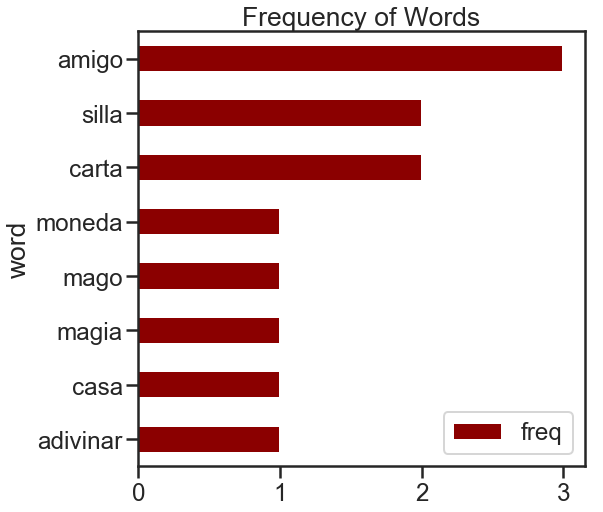

In [188]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
df_x=df ### select the most cited ones
df_x.sort_values(by='freq').plot.barh(x='word',
                      y='freq',
                      ax=ax,
                      color="darkred")

ax.set_title("Frequency of Words")

plt.show()

In [127]:
# def remove_final_coma(lst):
#     corr_w=[]
#     for w in lst:
#         if w[-1]==',':
#             #print('coma')
#             w=w[:-1]
#         corr_w.append(w)
    
#     return corr_w

# words_all = remove_final_coma(words_all)
# words_all

['hola',
 'amigo',
 'mago',
 'adivinar',
 'amigo',
 'silla',
 'casa',
 'amigo',
 'silla',
 'magia',
 'carta',
 'moneda',
 'carta']

In [21]:
def map_book(tokens):
    hash_map = {}

    if tokens is not None:
        for element in tokens:
            # Remove Punctuation
            word = element.replace(",","")
            word = word.replace(".","")

            # Word Exist?
            if word in hash_map:
                hash_map[word] = hash_map[word] + 1
            else:
                hash_map[word] = 1

        return hash_map
    else:
        return None


# Tokenize the Book
words = tokenize()
word_list = ['the','life','situations','since','day']

# Create a Hash Map (Dictionary)
map = map_book(words)
sortednames=sorted(map.keys(), key=lambda x:x.lower())

# Show Word Information
for word in word_list:
    print('Word: [' + word + '] Frequency: ' + str(map[word]))

Word: [the] Frequency: 192
Word: [life] Frequency: 5
Word: [situations] Frequency: 1
Word: [since] Frequency: 4
Word: [day] Frequency: 1


In [48]:


sortednames=sorted(map.keys(), key=lambda x:x.lower())
sortednames

wordlist = removeStopwords(sortednames, stopwords)
len(wordlist)

792

In [51]:
lst=[]
for w in wordlist:
    lst.append([w, map[w]])

    
df=pd.DataFrame(lst)
df.columns=['word', 'count']
df

word  count
0          abandon      1
1          absence      3
2           absent      1
3       absolutely      1
4        abundance      1
5     accidentally      1
6     accomplished      1
7      accordingly      2
8         accounts      1
9           action      1
10        actually      1
11           acute      1
12        advanced      1
13       advancing      1
14          advent      1
15          afford      1
16           ahead      2
17             aid      1
18             aim      1
19             air      2
20   all-pervading      1
21          allied      1
22           allow      1
23        almighty      1
24      alteration      1
25     alternation      1
26         anatomy      1
27          animal      3
28      antagonist      1
29      anthropoid      1
..             ...    ...
762          voice      2
763         wafted      1
764        walking      1
765           wall      1
766          walls      1
767       wandered      1
768      wandering      1
769         waning      1
770           want      1
771         waters      1
772         weapon      1
773          weird      1
774        welcome      1
775           went      1
776    whereabouts      1
777         whilst      1
778          white      2
779      whiteness      1
780         whiter      1
781         wholly      1
782           wild      2
783       windings      1
784         wonder      2
785       wondered      3
786      wonderful      1
787     wonderment      1
788          world      2
789        wounded      2
790        wrought      1
791         yelled      1

[792 rows x 2 columns]

In [60]:
(df['count']>5).sum()

10

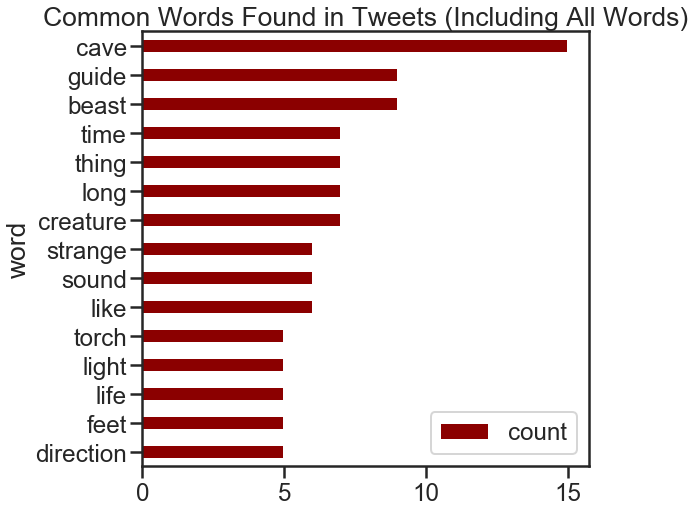

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
df_x=df.loc[df['count']>4] ### select the most cited ones
df_x.sort_values(by='count').plot.barh(x='word',
                      y='count',
                      ax=ax,
                      color="darkred")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [18]:
wordstring = 'it was the best of times it was the worst of times '
wordstring += 'it was the age of wisdom it was the age of foolishness'

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("String\n" + wordstring +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

String
it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness

List
['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times', 'it', 'was', 'the', 'age', 'of', 'wisdom', 'it', 'was', 'the', 'age', 'of', 'foolishness']

Frequencies
[4, 4, 4, 1, 4, 2, 4, 4, 4, 1, 4, 2, 4, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 1]

Pairs
[('it', 4), ('was', 4), ('the', 4), ('best', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('worst', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('wisdom', 1), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('foolishness', 1)]


#### Load data

In [2]:
df_2_b = pd.read_excel('2_bumps_interference.xlsx') ## data of 2 simultaneous bumps
df_1_b = pd.read_excel('1_bump_drift.xlsx') ## data of 1 bump

### 2 bumps interference
You can find a regime where you have repulsion for closer eccentricity and attraction for far eccentricity

Plot the spectrum of interest

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


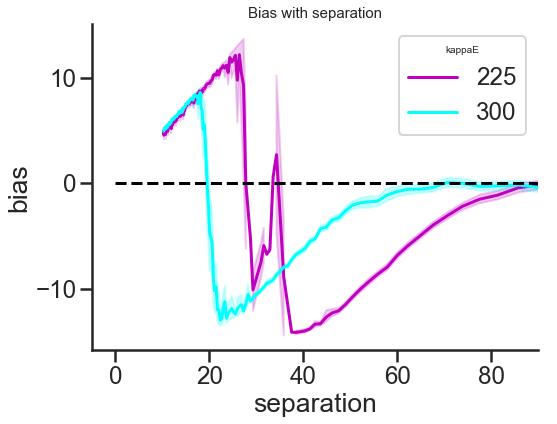

In [3]:
df = df_2_b.loc[df_2_b['success']==True] 
df = df[abs(df.bias)<1.5*np.std(df.bias)]

plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
plt.show(block=False)


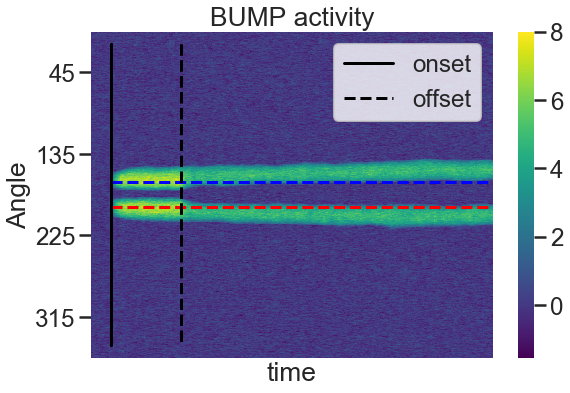

Simulation time: 12.5s


In [9]:
from model import *
r = model(totalTime=2000, targ_onset=100,  presentation_period=350, separation=13, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=0.9, sigI=1.6, kappa_E=300, kappa_I=30, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False)

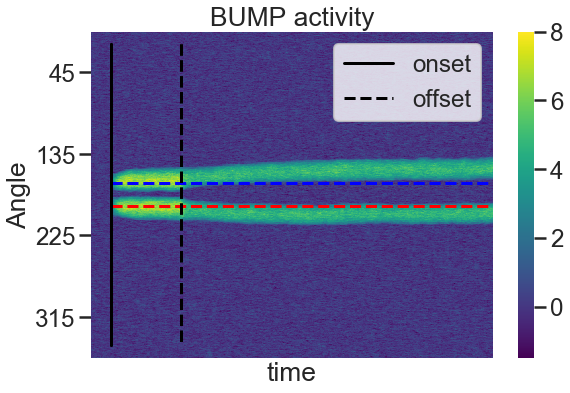

Simulation time: 11.1s


In [10]:
r = model(totalTime=2000, targ_onset=100,  presentation_period=350, separation=14, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=0.9, sigI=1.6, kappa_E=300, kappa_I=30, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False)

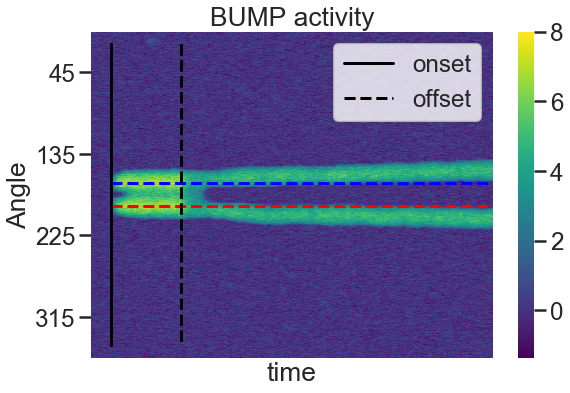

Simulation time: 11.8s


In [11]:
r = model(totalTime=2000, targ_onset=100,  presentation_period=350, separation=15, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=0.9, sigI=1.6, kappa_E=300, kappa_I=30, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False)

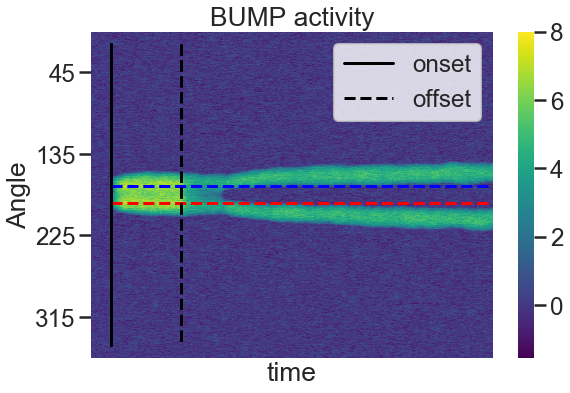

Simulation time: 11.1s


In [21]:
r = model(totalTime=2000, targ_onset=100,  presentation_period=350, separation=19.5, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=0.9, sigI=1.6, kappa_E=300, kappa_I=30, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False)

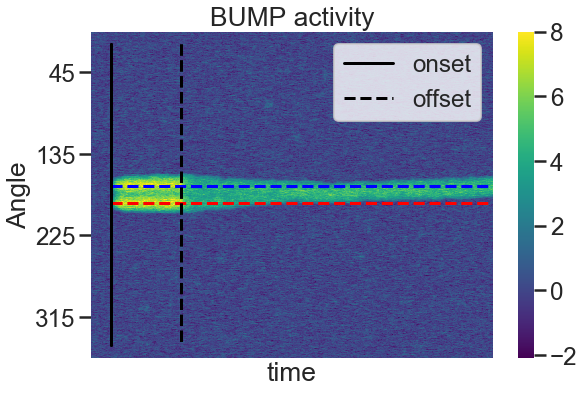

Simulation time: 10.8s


In [54]:
r = model(totalTime=2000, targ_onset=100,  presentation_period=350, separation=19.5, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.25, sigI=1.6, kappa_E=300, kappa_I=30, kappa_stim=150, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False)

In [5]:
df.head(10)

bias  kappas_E  kappas_I  separation  success
0 -3.803062       300        30  240.000000     True
1 -1.044923       300        30  208.715953     True
2 -0.506969       300        30  184.647160     True
3  1.815913       300        30  165.555556     True
4  0.430735       300        30  150.041958     True
5 -0.217972       300        30  137.186701     True
6  3.369657       300        30  126.360424     True
7  0.168016       300        30  117.117904     True
8  2.064585       300        30  109.135300     True
9  0.865999       300        30  102.171429     True

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


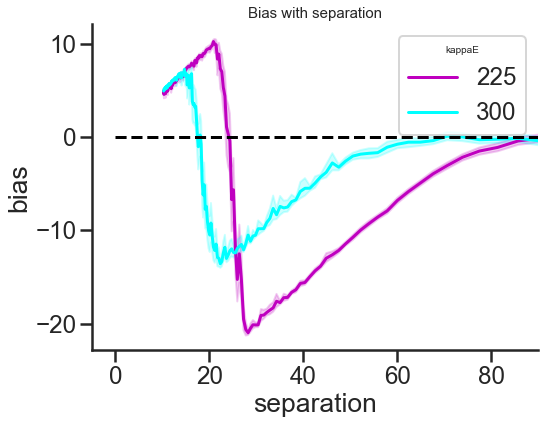

In [6]:
df = df_2_b.loc[df_2_b['success']==True] 

plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
plt.show(block=False)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


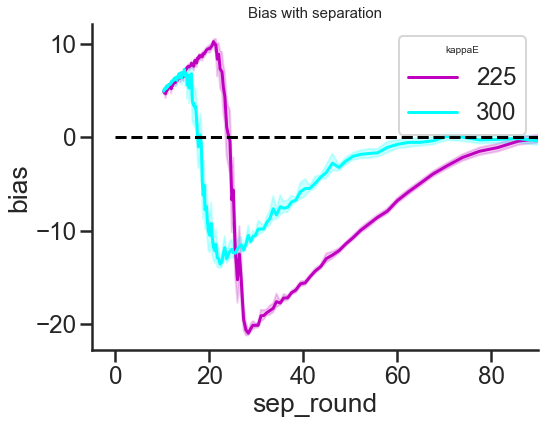

In [7]:
df['sep_round']=df.separation.round(1)
plt.figure(figsize=(8,6))
g = sns.lineplot( x="sep_round", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['sep_round'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.XTick at 0x1a523a567b8>,
 <a list of 2 Text xticklabel objects>)

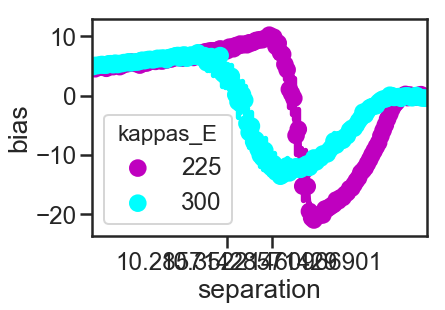

In [8]:
g = sns.pointplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], alpha=0.1, data=df, legend=False) 
# df.separation.unique()
# plt.xlim(70,90)
plt.xticks([60,80])

In [ ]:
df.loc[(df['sdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb0AAAE2CAYAAAD1WUxfAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzsnXd4VFX6xz9TMumdkJAEQr9gqCog2CtiB9b9YQVRFKwo6rqoa8OOujZEdF0UdVFERWVdRAQR6V0QLjUQEtJ7MslkMvP742SA9GTmTknmfJ4nz8C9557zTv3ec85bdHa7HYlEIpFI/AG9tw2QSCQSicRTSNGTSCQSid8gRU8ikUgkfoMUPYlEIpH4DVL0JBKJROI3SNGTSCQSid8gRU8ikUgkfoMUPYlEIpH4DVL0JBKJROI3SNGTSCQSid8gRU8ikUgkfoMUPYlEIpH4DVL0JBKJROI3SNGTSCQSid8gRU8ikUgkfoMUPYlEIpH4DVL0JBKJROI3GL1tgD+hKMo2oAdQBhzwsjkSiUTSXugNhAGHVVUd6kpHUvQ8Sw8gsvYvycu2SCQSSXujh6sdSNHzLGVAZHh4OP379/e2LRKJRNIu2LNnD6WlpSB+Q11Cip5nOQAk9e/fnwULFnjbFolEImkX3HLLLWzcuBE02BaSjiwSiUQi8Ruk6EkkEonEb5CiJ5FIJBK/QYqeRCKRSPwG6cgikUhaxJxmJvfLXCqPVGKrtGGMNhI5MpLYq2PRm+S9s6T9IEVPIpE0SdFvRaS/kk7+0nyw1z13jGOYEkx0mdKFrjO6YoyUPycS38cvPqWKonwJXA9Eq6pa1ESby4BHgeGAAdgHfATMUVW1xlO2SiS+wtHZRzn0yKFm21iyLBx57gjps9NJuj+J5PuTCUwM9JCFEknb6fDrEoqi3IUQvObaTAaWARcDOYhYkMHAW8D3iqL4xc2BROIg7YW0FgXvVGxmG+kvp7MueR27/rKLko0lbrROInGeDi16tYI3p4U2A4H3gWpgvKqqvVVVHYwQvaPAGMQMUCLpsNjtdqxlVgp+LmDreVtJezzNyY4gb3EeW8/ayrF3jmlqo0SiBR1yBqMoSjTwGnBbK5o/hngdXlNV9WvHQVVV/1AU5SbgN+ARRVFeV1W10i0GSyQexFZto/zPcopXF5O/LB/zHjOV6ZXitk8r7HDgvgPo9DqS7pZpZiW+Q4cTPUVRRgHfAzFACfAEYpmysbYhwF9q/zu//nlVVdcoirIH6A9cBnznBpMlEo9QmV5J5vuZZLydQU2JZ7ap99+3n8izIwkbHOaR8SSSluiIy5t9EYL3AzAQIYBNMQQwASWqqu5qos362sfzNLNQIvEgdrudtOfSWN99PUefP+oxwQPABulvpHtuPImkBTrcTA/YBZyjqurvAIqidG+mbe/ax8PNtEmr11Yi8Wkqj4oZXc6iHCqPVILFu/Zk/yeb3q/1JiA2wLuGSCR0QNFTVXVzG5p3rn3Ma6ZNQe1jp8ZOKooyCZjUyvGGtLKdRNIodrud0k2l5CwUgma32NGH6EEPNouN0g2lWDK8rHL1scCeSXs47bPTMEZ0uJ8cSTvD3z+BwbWP5mbaOM4FN3G+O3C+VgZJJPWx2+1U51aT/Xk2Wf/KonxXubdNajMFPxSw9aytDPpxEEEpQd42R+LH+Lvo2Wofdc20cex72ps4nwb82srxhiCqpkskLVJdUE3W/Cwy3sug8kD7dxyu2FPB9ou2c/q60zF1NnnbHImf4u+i56jC29ytpyO9RKOzQVVV59OI52djKIqyCjkrlDSC+ZCZ/O/zqThYgXmvGXOamcpDldDBcgFVHqpk37R9DFg8wNumSPwUfxe9/NrHmGbaxNY+5rrZFokfUvBzAcdeP0bBjwUtN+4g5H2dh/mwmeAeTe0YSCTuw99Fb2/tY/dm2jjOuVymXuJ/WEutZH+WTd7iPKqOVWG32jFEG4gYGYGtzEbWR1neNtErZMzNoPfL0iFa4nn8XfR2ARVAtKIoiqqqaiNtRtY+bvCcWZL2iN1uR6cT28PWYiv77tlH7le52KsabgeXbSprcMyfyF2YK0VP4hX8WvRUVa1UFOW/iKwsU4CHTz2vKMq5gIJYBv3R8xZKfBFrsZWSTSXkf59PycYSzKoZa4lV7L8ZEC5PthY68XMsOT4WViHxG/xa9Gp5ARgHTFcU5Q9VVT8GUBRlAPBpbZs3VFWt8JaBEs/imJc5XHot2RYyP8gk77s8KnZVYDM3o2gdzPHEXdhrmnKGlkjci9+Lnqqq2xRFeQx4BZivKMozQBEihZkeWAq85EUTJW7GDvwCzAVWAfl2O0YbdM6v5twvc7jqnxkkHWwulFPSVgKiZXYWiXfoiLk324yqqq8CVwArgChEgum9wN+BcbKIbMfldyAVuAT4CpGax67TUW3QkdHZxMJ7k7n5wAj+sTiVok7yh1orQgeFetsEiZ/S4Wd6qqqm0XzwuaPdj8h9u3ZFKbAdKEQEUyYhNl9/rf3LBQIQ8SiDgFuBg8DXQAaQDah2OzZdix8PfhsXx/7Bocy8dS/J+81E5lWjb8MKXUm0kbykQGqMOiLyq+mcXtXyh7IDU7K+hLI/yggbKKsvSDxLhxc9ScehAvgceBvYQ9vKv/0MvN7YiVYInoOsXiHc//vpAETmWrjsk2yumZtJRH41OV0DsZr0hBdaSThsxmADq1HH79d2YsndiWy7KLpOXwmHzVwzN5MxH2URladlITvtMcYZ6TKpC8VriilZp01FdFuZjc1DNzPw+4HEjolt+QKJRCOk6El8Fhuigu9CRCHDTO+aU4fiOBOLZnRl0YyuDc7FHK9i1JI8No+OIauJAOysHsHMe7kX85/uzj0PHuSa933g2RkhuE8wQSlBBPcIJlgJJkQJIfriaPQBeg4+elAz0QOgBv64+g8G/TiImEubyw8hkWiHFD2JR7ADm4GNQDGiiGERkINYkjxe264rIjnpCquNQwZdm2ZivkJBl0B+mNq6auGWYANvzO1LUVwAt8464mbLGscYbaT7rO4kTUs6EWfYGF3u6EL6qxrXxquB3X/ZzfC9wwnsEthye4nERaToSTShCNiG2EfLQohadyAc+AQxU2tN7pF1jn8Y/cvH6t/P9SDpgJmLF+Z4bExTkoluj3UTYmdo+eYipG8I0ZdGU7i8UFM7akpqyJyTSY/nemjar0TSGFL0JK3mGPA/m52MShs2wBKkZ6dexw6EY4jENd5/pScXLMrF4MYYtqDeQXSZ1IWESQkEJrV9ZtXr1V5sHbUVW4W20feZH2SS8mQKepN/3exIPI8UPUmzVAEv2O18bLZxNFiPXa+DEIO3zeqQ5HYNYt1VsZyzpLmaxk6gg5jLY0ienkzMZa7tnYUNDiN1USq7xu1qNL2as1RnV1O0soiY0XJvT+JepOj5CbmImVoFsAYRcb/TZqdEB4GVNuKPW+iaXkWASUdmvxCKgw0U6qDKVLuvJoXOIyy9o0ubRU8fpCeodxARIyII6ByAIcSArdwGejAlmIi9IpbgXtpVNIi9IpYhvwxh1/hdVGdp53lamdb+awZKfB8peu2QKk46gxQj4s6O1B6PBgbZ7STodBQCq+12fqqw8WdoI6KlF/s4lcEGjvQM5khPWerF2xwY0oa4NT2k/COFlMdS0Ad6dlkwclQkp689nQ09tcvDXmOWOSAk7keKng9hBnYgsoIYgUSgH/BfYB6wHiihXnpHu72hh+Op/9fpoDHBk/gkFRGte6+M0UYGLBlA1LlRbraoaYJ7BGvq2GKMkj9HEvcjP2VeoAiRyboC4bK/CdiC8G5s871uO3TplzRNcFnzn4CATgEk3J5A8gPJPuHin3RPkmaiFzEiQpN+JJLmkKLnBbYDP3jbCIlPkrS/bmLryAsiiTgrAmO4kRAlhJgrYzAE+c7MPfbqWMLOCKNsi2v1AU3JJkL7y3ycEvcjRU8i8SEun58lvC3HxND1oa5EXxzd8kVeRKfXMei/g1ibuNalskqWYxbS/5lO1+kNM9xIJFoig2IkEh8hsqKG24eGMeLACAYtHeTzgufA1NnEgCUDRAFdFzj40EGKfi3SxiiJpAmk6EkkPsLMEAN9708muB160Xa6shPnms8l5goX4uzscOQF76Rik/gPUvQkEh9gEDCO9l143RBgoPONnV3qo/CnQir2V2hkkUTSECl6EokPsBPoA8QjqkpYgEO0PxHM+dT13KHZn2VrYIlE0jhS9CQSHyIfuAEIAnoBCcBqr1rUNswHzS03aoGilXJfT+I+pOhJJDY7hiobOqsdbO5L9twWHFbkAeMRtQXbAzaz65YWrymmeG2xBtZIJA2RoidpX9jtdE4zM/bNdC7/6DixmVVOdxWRV8299+1jaeQafg5azaqo39h5/34+PFJJioYmu0oeolJ8e8AQqUEMoQ32378fu903bkAkHQsZpydpN4QUW3lu7C5OX1kEegg/PZwYSw0rBoSxIi6ALLOd6vxqIo9UMuy/+ZgC9Sx7IJk/B4dRZNIRoNPRBbgcmAwM1EHVpC7UXN8ZQ4SBECUEQ7CBgbVtuuE7M6z2koo5/MxwKna77ohStqWM0k2lRAyXWVok2iJFT+JZ7HbC8ywM+bWYnn+UE1RhI6zQSk7XQH6amEB296AGl0TkV3PFx1nc8GUOKRFGol/pSZfJXQiIDQDgjtq/k0PYYVICOr2Omc3ZEhuAqbaP+iQBk4CPnHuWmtNeHFoS70wk+2NtHFEy52ZK0ZNojhQ9iWYElltJ3lvBeYvzCC6v4eDQcMxhegIrbIQXWOm3oZgLvsojwNr4stXEZ9PYdlE0+4eGUdk5gPBQA3108H9Dwoh/MBndQ63L1qHT6UCDlKRvAX8gcqN6m2uBB4B7gTbUYfA4ESMjCB0cSvmOcpf7KllfooFFEkldpOhJ2oyxooZ+W0oZtqwQHRBWWM1p60vou7Wsgdbog/Sgq+vgYIwzEnt5LPpgPeW7yqkpqUFn1BHQKYDrL4wiYXICgQneT6YcCvyEiJ9b6WVbsoC/A/OBH4EeXrWmaXQ6Hb1f782OS3ac9MZxEmuhVRujJJJTkKInaRybHYPVjqnSRqDZRlxGFd13lXP5/CyGrixqcSIV0DmA7s90J2lqEjarDUuWBVu5DUO4AVOCCZ2+fVSHiAKWA58B7wIbvWsOKnABosxUF++a0iTRF0UTMSqCkt9dm6npg6SfnUR7pOj5GQHmGlL+rGDQ6iKS91VgDjeS0y2Ikk4BBARA9HELZ3+ew4B1Ja1eIdQZdRijjQQmBRI6KJSE2xKIOj9KLDMCeqOeoOSGe3XtBQNwa+3fZoTouL545zxHgZuAX7xoQ0tEXxLtsugFpnh/ti/peEjRa680Vjy2/jGbnZQ/yxm8upjUtcXEHreQuq6EILMNXZCO6MuiiRgeSOzZEQT3CcYYJj4O1TfEU7SqiKOvHKV0Y2mTJhgiDCTdnUT3p7t7vHK3tzgTUdR3PCKUQIdYxdPjWU/PlYi9xmEeHLMtdJ7QmSPPuJZHM/7GeI2skUhOIkXPxwgsrSbIbMcaoKMiwohdDzobGKvtROVaGLS6mKvmZZJ4wMyWy2IojDdh10FUjoWeO8uoDDNSEW4gpLSGlD0VxGRb6vSvM+ro9nQKKY+noDc2LlQBsQHEjY8jbnwcFfsryHw/k+LVxVQXVKM36QlMCiTu+jjib4rH4IdV2c9D7LEdAboC6QgBHOFhO97Dd0UvtF8oURdFUfSLc9lVDBGu5/GUSBpDip4XCS6uJnVdCUN/KSLxcCV9tpWRdEoaJztg14G+CYeAMfOz6h4wginehCXT0sCJwNTFRMIdCSTfm4yps6nVNob0CaH37N6tbu8vGICetf/uCWhTO7xtLAI+wOWKPm6j22PdnBa92GtjT6w8SCRaIj9VXiDlz3JmXLCd09aXYKqqtyhmEh5w9io7OkDXhODpw/TE3xBP2OlhYBc1zSLPj8TUyUTlkUpKNpRgLbSiD9IT1D2IiLMjmpzZSVzHGzuWZUAREOuFsVtDzKUxdH+2O2n/SGvztQU/FGCrtqEPkJ9ZibZI0fMC0TnVDNla9w44bGgYSfcmEX9rPHqjnooDFWTOzST702yqs6tPthsSRpc7uxB/czzG8MbfvqCUIIJS2q/jSHukH9AJsczpSZxPwuYZUp5IQReg4/DfD7fpOmuhlbXxaxnw7QCizotyk3USf0SKnhcI7htMym0p2KvtGGOMRJ0fRfiw8BPejgAhvcWyYq9Xe2Ez27CZbRgiDPLO10cxAIs56eASCXgiZbKv11bX6XSkPJZCYJdA9k7a26ZrrYVWdo/fzajsUe0mxEXi+0jR8wKBiYH0eLZ14cU6nQ5DiAFDiK/u3EgcnOrg0h24E/iXG8cLQ3iM1tSOmYLv7u+FDgh16rrqvGoq9lQQmurc9RJJfeS0QSLREIeDix7hXXmlG8cqA65A1Nzz9dp7rgSa2yp9Je23pCMgRU8icRMBwBLgajeOsZqT+4i+XHsvpF8IAZ0aT+4tkXgSKXoSiRsxAN8BT3poPF+tvacz6EhdnKpNvT2JxAWk6EkkHuBZYJaHxvLZ2ns6ZGFYideRoieReIjLPTTOMXyv/l7RmiJ2XrYTW4kvLr5K/AkpehJJB+M6fMupxZJnYdd1u6RDisQnkCELEkkHxOHUko3372yPv38ca77ztfHK95YTfka4hhZJtMZut1O6pRTzPjM15TUYI4yEDg4ltF/rQ01sVTaq86vBDsZYI4Yg9+z/StGTSDyEp3PkOJxaUj087qnYrDYy3890qY+chTkk3JSgkUWSxrAD64A1QD7C8zgOGAP0pukbJ2uZleyPs8mYk0HFnxUNzhtjjZjiTAQkBBCUHESnsZ2IvSaWEqOePUDWwQrM3+QR9XUeIRtKTroe6yHq/CgS706k07WdNH2uUvRqURQlEngCcYOcjHjvVwKzVFX905u2SToG3khVloV3Ra/4t2Kq0l1LllawtABLvgVTbOsTpUtaRzXwb+Ad4I9Gzk9HCN45wN+BSxGfqQKbnYpfCymctp/tPYLZelsCu86OJCc5kIpII9WBeux6CC6rIXmfmUs/zabHjlK+s9jYlVNNfoIJu14HvULg4W7oHurK8P8VcM17mYz4bz4GGxStLKJoZREBcQFUDdQu4Z4UPU4I3m/AQKAC2IlIcHEDcJ2iKFerqrrCiyZKOgD1U5U5avG5kymIwrcxbh6nKSoPaeBLaofd43YzZOUQmY5MQwoQ+7+/tdDOhtgfXg3o7HbsOh3odXBhDOwZ3rCu5ymURevZOyKAvSMimh3Drtex4YpYNlwRS7ddZbx22U46HRdl0apzqzHvM0NIG55cM3h7ud9XmIcQvJ+BZFVVzwQSgVeAYOALRVGaf9ckklbgSFV2EFH53LFw467otcPAX3G/uDZFjVkbP9Li1cXkL83XpC+JyOZzGS0LXn3s9QWuGcFzlqMDwrg+YySXl57DTfuG8/D/BnG8u3abA34veoqiKMBfEDO8m1VVLQRQVbVaVdW/ASsQ1Vumec9KSUfCkarsAk4K4EHcVyJoBWKd3hsYI7VbTMp8z7W9QX/HisgQdBui+PEW75rTPDodVWFGMvuEsGV0DNlS9DTlZsTr8KOqqtmNnJ9X+/h/njNJ4i84BDAFsazgLua4se/mCB+mnddlwY8FmI+aW24oqYMVkREoHrGcOR9Rh9FfkaIHI2off2/i/PraxyGKoki/aYnb+NbNfRe4sf+mCO0XSuQ5kZr1l/ZkmmZ9dXTsiPc9EZENyBvvvy8iRU945ILY/miMDMTNkg6RzF4icQtr3dh3DbDfjf03R+LdiZr1lf1JNkVr/Hme0jqqgBuBsUCul23xNaToQefax0Y9yVVVreFkPVBtA0YkklModHP/i93cf1N0/mtnws4I06y/9FfSNeurI1IIDAEWetsQH0WGLAjvTIDmNgsc54Lrn1AUZRIwqZVjDWm1VRK/I5DmP4Su8jrCiaG/G8doDJ1Bx4BvBrA+Zb0mbqT5P+RjTjMT3L3B19Hv2Y/Yr3H3DVR7RoqeWPnRI5Yvm8IxI27sK9sdOF9jmyR+SAqw14391wBvAnPdOEZTBHUNotO4TuQt1iA03w65X+XS7eFurvfVgTgKnIsUvJaQogflQBTNZ4kKrH1s7EY8Dfi1lWMNAbTb1Zd0KCYAT7t5jE+Bl/HOhzD5gWRtRA9czvLS0SgELkHkWpU0jxQ9kW4siiaSViiKYqg9D43sCauqOh/hBdwiiqKsQs4KJU0wBXgO95YFKgeWIpwcPE3kOZFEXRBF0SrXHVFkxQZRN/ELhGfmAS/b0p6QjiwnV5S6N3E+GRFOZUfEEEskbiERmOiBcbzlBqLT6Tjti9M0ST8TEBPgeiftFDtith6FcCaQgtc2pOjBxtrHkU2cdxzfrapquQfskfgxbwLRbh7DmwuDps4mYq9wPfdMxCj/zAr4CyKbymN4931sz0jRO+nJfY2iKPGNnJ9S+7jAQ/ZI/Jgw4DQ3j+Gt5NMOkqcnu3R9YNdAYsZ4+1l4no8RVQ4yvG1IO8fvRU9V1d2IxAUhwNcO4VMUxagoysvARYh9P284vUn8kMCWm7jEOW7uvyWiLowiyIVciolTE9Eb/eun63tEuIncyXQd//rkNM3diP26UUCaoiibgUzgUcACjFNVtcSL9kn8CHeWSx2B94NFdTodXR/r6tS1oQNCSX7AtZlie+JPYCpwDd6rlNHRkKIHqKp6HBgGvIYQu0GI7fZvgJGqqq72onkSP+NaN/Z9txv7bgsRZ7Z9Ty6oVxAD/zsQQ6i7CjH5BnbED88FiALA73vVGiex+65Ey5CFWmpLCj1c+yeReI3rELO9LI37vRC4SeM+PUXsNbEoHyqY4jp29fRq4C5ENXNvY6y0YQ2qNy+y21usoddzZxkP3rWPXyZ05te/xlGQYGr0mp6HKjBV2znaNYiKYL1bavM1hhQ9icTHMAH3Ak9o2OeZwNe4r1itO+n3n35EDo/s8GEKdsS+3WdetiM2o4qJTx/mqg+zKEgwkd0tEEuQnvBCK4n7K9h+cQxL7k5kyyXRWE1CFE3mGkb8WMDD/YO5JMJA+SNdGV9kRf9rETn9QvhlcBjHdTqsQBzCUWJYz5Ol0A8hav39CuxEOFGYETcB0Hy6rLbisugpimJUVdV6yv/1wA2I7YMC4FNVVWUoiUTSBh5Bu+KvgQhXd1+qi6WvP4Nohv1T91NTXENApwBSF6cSdV5Uyxe1Q+biJcGz2em7tZTTVxRx5YfHST5wMvFUbJaF2CxLneYjl+Yzcmk+NXoojzSis0NosZWk27ugjFMACDklL2o8MLAFE3oCD9b+nYodEYQ/Bdjk3LNrgNOiV1tx/A1EysDUU059A1x1yv9nKooyRVXVj50dSyLxN0wIl+JxCPFzhSpEXsbUlhp6kJB+IQR0CqA6r7rFtjXFIkdNdV41u8fvZlT2KHR6zyyFeQob8KoXxg0rqGZR0jqCnMhwY7BBRKGY70RdGEWfd/tobR46RJZ/Ld9tpxxZFEWJQcxELwd6KYqiqz3+F+BqhI0ZwHGEsM5TFMXTyd0lknZNBPAjoqK6qx5n5YglJHemOGsLOoOO1MWpBHRq25JldV41FXsq3GSV91hG0wU93clT1+92SvBOJbhfMIOWDUJvah9+kc5aeR+iDl0OMPmU444sSmsQM9YU4EsgoPYaiUTSBgIQS50/A6Eu9DMaUQE5AfAVV+So86IYlTWKAd8OaNN1HTHv5hdeGHPAmmLO+MW1PKiGKANnbj4TfUD7EDxwXvSuRCy33qSq6ueqqtoVRQkCLq49PkdVVWttAdZHaq+5xHVzJRL/5ELEvpyzOH7a8oDx+E6Qs86gIzDZ3eH4vs8+D48Xn1bJ09fvdnnZsP8n/dtdCImzotcbqFZV9dTthvMR5XnsiBtTAFRVTUesriQ5a6REItHO8zIP2KNRXxLXyQG2enC8nn+W89a52xo4qLSVYCWY2Ktcz6PqaZx1ZAkF6i+sX1r7uFtV1fpFs4zIhAISiduI4uRsrjVUussQSZu5Gc8kj+4L3HmggoGnb8FU5fpcv/tT3dF5KLZOS5wVvWwgSVGUKFVVHd+10Qhh++nUhoqiDEJ4TR9y2ko/p6ysjJKSEioqKrBardh9ONuBxHl0Oh1Go5GQkBAiIiIICwtr1XVRwD8RZWbaI20JX+hoLACWu6lvAyLl3NUIj8MzzDVsPH87Fg0EL+yMMOJvaCw/v+/jrOitAf4PmAk8qijKdQiPaDsixhAARVFCEd9He+01kjZgt9vJycmhoKDA26ZIPIDdbqe6upri4mKKi4uJiYmhc+fOLd5N/4RwUDEC1mZb+iZtCV/oSGxABKO7AxOibmLnU45lfZmLJdO1JU0HcX+N06Qfb+Cs6M1BiN4MRVFuByIRwrZNVdU1AIqiTAWeRHwfbcDbrpvrX5SUlFBQUIBOpyM2Npbw8HBMJhN6vf/eGXdkbDYbFouF0tJS8vPzKSgoICgoiMjIyGavWwLMpn0KHpwMX9h17S6sRe31WbSNSuB63BdC8gF1BQ8g413tihLFXdt+Rc+pX89aYbsXkSUmurafdOqm9osHutS2maaq6hbXTPU/CgsLAYiPjycuLo6goCApeB0YvV5PUFAQcXFxxMeLpSPHZwCEl1hjPE/b94R8rSZb1HlRDFo2yNtmeIxFuK+C/Qjg1nrHqo5XUbqpVJP+oy+JJkQJabmhj+L0L6iqqu8B3RA3LGOAvqqqqqc0+RURV5uqquqHLlnpp1RWCneDiAj/rBLtzzjec8dnAKAf0Emj/q9FxB1t16g/LdAZ2p9ThDPYgb+5sf85jRyrytTOVSb5wfZd2sml3JuqquZwsvJ4/XOrgFWu9O/vOBxWDIb2FQcjcR3HjP5UpyUD4ss2HhF2YMC15bH/ImL//oOo7OBt/MWhZRIiVZU7OBc4vZHjmXMzNek/ZkwMsVe0vzCFU/HYp0xRlOY3JiQSyQmacl45D1Fy6Au02Q9y7C25mt9TC0L6haAPbvknyW5rf97LduA7YDjwiZvGiKPxkkQlm0rI+lCbQlXJD7XvWR64ONNTFOVM4GxEmkD/LGOmAAAgAElEQVQjdfOC6hBZlEKA7ojgdSl8EomLGID/adifFbEZfxiR3Ndb6Aw6Ok/oTNa/m/+B3j1+N8kPJpM4NRFDsO+vglQi9tgWuXGMRMTMvVcj5zLe0mYHVx+mJ+Ks9r/V4pTo1SaY/gS4sZWX6JDB6RKJZuzWuL9sxOxxksb9thWbpeUYsqr0Kg4+dJCsj7MYtHQQgUm+m8asFBiJ9u+XAxNCUJ9BCF99LHkWcr7M0WSshIkJGMPafwlWZ5c3b6r9c8zsshBemnZEFZOi2nOO8ytpvUBKJJIWKHNDn405QHiSrAVZ5HzW+h/o8h3lbL9wO5Y8bWLPtOYYIl+juwSvN8IL9wMaFzyAohVF2C0azDd0kHR3x8gk6YrogfDQjFdVNQlRmFkHXKCqaizQFZFwQIfIu/mdi7ZKJJJaWperpW1sQuSB9AYVagXq7WrLDeth3m9Gndz269xNFmLfx12vZwKwmZa9eXO/ydVkvOSHkwk9zZU6H76Ds6I3BDGre+CUPJu/1z5eBKCqaoaqqhMRsbN9gDtcMVTSdt5++20URWH27NneNqVDsGHDBhRFafXf119/7TZb3FUQNttN/bZE+hvp2Kudm5Hkf59P+Z/lGlvkPHZgAmLJy138QMsOEsXrisn9UiPRm97+HVgcOLtAG42osrDzlGO7ELO6YdR1InoWERb0F2RWFkkHICQkhIsvvrjFdt26dXObDZNp3FPPVbyx8W4ttpL9qWtym/leJn3e1r5ytzOsQyyBuYtHgTNa0e7IrCPavKEGMMWaNOjIN3BW9KpoWJLrQO3jaaceVFV1m6IoFkBWTpd0CKKjo70+ez4bGAj8oXG/9VNXeYL8/+ZjK3ctCXLOwhyfEb133dh3MvBiK9qZD5kp+FGbnL3RF0ajD+w4MZTOPpPjQISiKNGOA6qqZiC8cxtbebEgwxUkEs3QAS9o3GcfxF6Rp6k84nqho+q8amrM7spk2XqqgK/c2P+7tO5HO/vTbM2m7Yn3NOUm0z5xVvQc+3cP1Tu+B4hRFGWo44CiKP0R++5mJ8eSaMyKFStITU1l4MCB/PbbbwDU1NTw7bffMnnyZEaOHMmAAQM488wzmTBhAp9//nmDcka33HILiqKQnZ3NvHnzuOSSSxg0aBCjR4/mrbfeory87h6LYz/sH//4BwcOHOCOO+7g9NNPZ8SIEdx+++1s2rSpUVuPHj3Ks88+y5gxYxg6dCgDBw7kwgsv5O9//zuHDx9u0P7QoUM8/PDDjB49moEDBzJixAhuu+02/vc/LSPbfIOrgOc07O96DftqC6UbtckJadOgZI4r5AFXIO7w3UEvROq41lC6WZvXNKhHULssFNsczi5vfoioijFTUZTTgJm1eTd/BoYCnyqKMhkRR/sm4p5jhwb2SlxkzZo1TJ8+Hb1ez5w5czj33HMBePDBB1m2bBnh4eEMGTKE4OBg0tLS2LZtG9u2bePo0aM89thjDfp75plnWLFiBYMGDaJ///5s2rSJd999l1WrVvHxxx8THh5ep/3hw4eZMGECer2eUaNGkZeXx5o1a1i3bh3PP/88Y8eOPdF269at3H777VRUVNC/f3/OPfdcSktL2blzJ19//TXLly/nhx9+ICFBzE/S09O5+eabyc/PZ9CgQSiKQkFBAevXr2ft2rU8/PDDTJkyxY2vrufpqmFfl2vYV2spXl9M3pL6NaedwADGCM/EkNUAR4AUTqaCW4eIcTzopjENCFf41oTiVx2vovDnwpYbtoL+C/qjN3acpU1wUvRUVV2nKMo7iEoL1yEC1VXgLWAaIjfu2nqXve+CnRIN2Lx5M/feey9AHcFbvnw5y5Yt47TTTmPBggV1ipcuXryYmTNnsnDhQmbMmEFAQECdPn/55RdefvllrrtOZG8sKytj6tSpbNq0ibfeeovHH3+8TvuNGzcyePBg3n//faKjxer4smXLmD59Os8++yyjRo06UWHg6aefpqKigldeeYVrr732RB/FxcVMnDiRPXv28O233zJ16lQA5s6dS35+PrNmzeL660/OWzZt2sStt97KnDlzmDhxIiZTx9mU39lyk1bjDc/NtKfTGnoHOEHEWRHo9O5PWL2ak7lPw4AY3Oul6eBdRJB7azhw/wFsZtdf1MBugUSe3fF2pVypsnA/otL9OmpvcGr39cYC+ZwMTrcDr6qq+rnL1kqcZufOndx5553U1NTUETwAi8XCRRddxCOPPNKgWve4ceMICgrCbDbXKXPjYOzYsScEDyAsLIyXX34ZvV7PV199hcVSd7HHYDDw2muvnRA8gNGjRzNu3DgqKir45ptvACgvLyc1NZXrrruujuABREZGcsUVVwCQmXkykW5OjoiKcoimg2HDhjFr1iyef/55ampc3/fJyMhoMVzhlltucXmc1qBlkPr1iOU5bVITt0zFgQoKl2kzI0mc6t59JysijdhohOCBeO09IXhnAHe1sm3l0Upyv9YmTCHqvChN+vE1XK2y8Dnweb1jKxRFSQEuAMKBjaqqprkyjsQ19u/fz5dffkl5eTn33XdfHcEDuPLKK7nyyrq7BRaLhbS0NHbs2HEi+XF1dcPK1ldffXWDY0lJSfTv35/du3fzxx9/cMYZJx2sBw8eTNeuDRflLrnkEr766is2bNjA1KlTCQ0N5cUXG/qp5efns2fPHnbs2NHAppEjR7J69WoefPBBrrvuOs477zyGDRtGSEgI48ePb+4lahOtCVno1auxLIjao3W48I+IGcUKRMYPd5L9sTZzy4C4ADpf7x6/0yrgdcRMyxs1CEMQe0mtJXNepiYzZ4Aud3TRpiMfwy2L4KqqmhHfH4kPsGrVKoxG8VYvXLiQW265pUE17tLSUhYvXszq1atJS0vj+PHj2Gzi2+MQvfrOLNB0LFqXLl3YvXv3idmXg5SUlCbbAw3ab926lUWLFrF3716OHj1KWVlZkzbdeuutHDx4kMWLF/Ppp5/y6aefEhAQwBlnnMHo0aMZP348gYGu52n0hZAFB+6IAzqKKJC5ERGQ6y7Kd2sTUN7nnT5ucakvRAQY/6Z5z60jCOEJOqQN1xQs1SZMISQ1hMjzOt7SJniwtJDEewQEBPDWW29x6aWXkpub22AGtX//fkaPHs2LL77In3/+Sc+ePZk4cSIvvfQSK1asICYmpsm+m6r15xAjh9g6aKrye2O1A5955hluuOEGvv32W0DMBmfMmMH8+fMbdaoxGo08//zzLF++nEcffZSRI0diMBhYv349zzzzDGPHjqW4uLjJ59IeuR73VEY4gKgAXQMcQpsyRvWpKXO914D4ADr/VftZXiVwNd4TvNMQxUjHtPE6S442vqO9Xu3VZHmr9k6LMz1FURzL1vtVVb243rG2YFdVtfHbfIlbufHGG7n44osZMGAA69at45tvvuHKK688scw5a9Ys8vPzmTx5Mo888kgdYbLb7ZSWNu3+nJWVdWKWdiqOvTaHZ6WD7OzGl7QyMsTikaOvzZs38/nnnxMfH8+//vUv+vSpG3i8c2fTLhxdu3bl9ttv5/bbb8disfD777/z3HPPcfDgQb744gvuvPPOJq9tb0QhMrn/yw19v4dYWstD5HhcjKjnpxWGMNfLAgWlBGlgSUNe4GRclie5GPg7IpdjWyXHbrNjLbS6bEP4sHBix3SsMIVTac1ML7n2r0sjx9r6J/ECDm/F+Ph4pk+fDsBTTz11IpZu27ZtANx5550NZmKbNm064YzS2PLmqlWrGhxLT09HVVViY2NJTa2bq2DLli2UlJQ0uObnn38GOCHEW7duBeDSSy9tIHggQi+AE0uwVquVm266iXPOOYfKypPBziaTiQsvvJAJEyYAcPy4u2pWe4+/of3eHkAxJ5028hBei1pGwoUOcN1qLfqoTyXeqThhQuTUvJi2Cx4IT1gtvDajzu+YDiwOWiN6z9T+vdvIsbb8PauZ1RKnuemmmxg4cCAZGRm8/vrrACc8KVesqFs/e/fu3XWWEauqqhr0N3/+fDZs2HDi/8XFxTzyyCPYbDYmTpzYQETNZjMzZ86s09fSpUtZsmQJnTp1OuEY47Bp/fr1dQLdLRYLL7/8Mhs3bqxjk9FoJCwsjNzcXGbPnl3HS7O8vJzly5cDMHDgwFa9Tu2JPsCXuGmD/hTyENkntCJhYoJzv+6n0GWy9s4WixDu557mr4h9PGeoyqzi6Iva+JLGXN70dkZHoMXviaqqz7TmmKR9oNfree655xg/fjyfffYZV1xxBZMnT+aFF17g8ccf56uvvqJz585kZGSwa9cuQkJCSEpKIiMjg9zcXHr3ruvTFx0dzaRJkzjzzDOJjIxk48aNFBcXc8EFFzB58uQG40dHR7N69WouueQShg4dSlZWFjt27CAkJIRXXnnlhIPNmDFjmDNnDgcOHDjRtqamhu3bt1NUVESfPn3Yv38/eXknA5tnzpzJ9u3bWbBgAStWrKB///5YrVZ27NhBUVERw4cPb9TbtK0UFhby8MMPt9iuV69eTJs2zeXxWsMViGrq1yMcMNyF6wnDThLcK5iYy2OczhEZOiiUiFHaV/L2Vg20u1249tjbx7BbXc87FqwEE3VRx57puXxzqChKEHAZcCYQh8jCkwVsAFapqurd3ECSBvTv35+JEyfy0Ucf8fjjj7NkyRLi4uKYP38+Bw8eZP/+/XTp0oW//vWvTJkyhf/973+89tprrFixgpEj64bIPvHEE+zevZtvvvmGnTt30r17dx544AEmTJjQqJNLt27deOKJJ5g9ezarV68mNDSUq666irvvvruOm39YWBhffPEFb7/9NmvXruW3334jNjaWvn37cu2113LNNddw1llnsX37dvLz84mNjSUlJYUvvviCuXPnsmHDBlavXo3JZKJnz55MmzaNG2+8sUFwvTNUVFTw/ffft9hu+PDhHhM9EMtim3B/qIGWdH+6O4U/FzpVVqjH8z3c4mzhjdCEC4GznLy2KqeKY7OPaWJH8v3JHdaBxYGusX2a1qAoig54GLHv2pRvazrwiKqqi5wzr2OhKMoq4Pzhw4ezYMGCFtvv2SMWk/r3970CFbfccgsbN27kgw8+4LzzWnZv2LBhA7feeiuDBw/myy+/9ICF7R9n3v+DuFf0NtO6sjZtIfuzbPbcsqdNCZJ7ze5F1xlaJmETVCMqTRRp3nPT9EKkr3LGB9VeY2fLyC2UbXI9TUHooFDO2HKGT6Ydc/zeAL+qqnqBK3258uw+Bl5COJDpEDdIm4GtiIxGOqAbsFBRlL+5YqREImkd7ghfOJV/Amka9xl/UzwDvhmAIbJ13pymLia3CB7ALXhW8IYgwiKcDbrI/SZXE8EDscfqi4KnNU4tbyqKMhaRggxETs0XVVU9Wq9NX4Tzyl+BFxRFWa2q6jpXjJVItOCFF16goKBt+0jTpk3zWJYVV+iM8OR0Vx3xTxEB0x8jvtha0enaTpx1+Cyy5mdx7PVjVB1r6DTlQGd0z/Lbm8AXbum5cV4F7kd4bTrLsX9qs6wJYIzxTMJub+Pss5yKWIx4TVXVRxtroKrqPmCCoijliIoMjwDjnBxPItGMn3/++URcYGu5/vrr24XoGYH/Az5y4xiVtWNUAzdp2G9AdABdH+xK5DmRbB2+tcl2WgS112cRMF3zXpvmHsTekCsUriqk5PeG4T/OEtzL3esEvoGzoncmIknDrFa0fQyYCJzj5FgSH6Q1e5KnMmLECET1Ke/zyy+/eNsEt3I37hU9B7cBgxAV3LWkpWoJ1hIr9ho7OoNrM77jiNdpGbDGpZ7aRnfgaRf7sJZY2XOTdgEkQT2CiBzVMdOO1cdZ0QsEylRVbfE2Q1XVXEVRSnBP/GyLKIryCmKWOVRV1e3NtBsGPAGci9gaSUMk035VVVUtPbUlErdyBsITcL2bx6lGLNF94uZxGlADvyf8zoDFA5yqBJAOPIqY3Xm61noyIrSkk4v9pL+ejiVTu3K1idMSXb6JaC84u2v5BxCpKEqPlhoqipKAcHbZ5+RYTqMoyhXAg61odxnCgeoaxHbIHoRT1bPAWkVRwpq5XCLxOV710DhfcDJriyex5lnZPX43tmob5kNm7DWtc/3cDgwHFuJ5wbsCcSOiuNiPrdpG5nvaFYAK6BTQYSsqNIazovcGwjvzPUVRWpotOtLRezSzj6Io1yD23Ju1T1GUzqe0ux/opqrq6QjP7+2ISvCvu9daiURbRiIKnLobC2LG5A2q86pZG7+WDb02sDZhLUWrm/e7PIwIKM7yiHWCYITH3x5gKZCkQZ/H3jhGdU7DMl/OkvpNKgHRrsevthdak3C6ZyOHNyNuliYgZkKzgJWqqpbWXhOM2Pebificvaeq6geaWd28vcHAPxApCVszX38AUfdvsaqqbzsOqqp6VFGUcYgZ6m2Kojyrqqp2rlISiRsxAN9wssq3Ozno5v6bw5FguTqvmt3jdzMqexQ6vY4ixLLrz0AuYik2vfbfnuI0YBcuZ1qrg/mQWVSb14jYq2KJOqdjZ2CpT2v29PY3c86O2EL4BkBRlIraY/X3725TFGWSqqpu3ddTFKU3sBKxdG4B7kOEVDTHrbWP8+ufUFX1sKIoyxEVPsYBb2lmrETiZs5DzGpuROTmdBdliPJDKQix9RbVedUc3VfBi/1C+QQwe9GWYMQPita7ZAdnHNQkqbSDlH/4X+Gb1ixv6trwFwqENXI8COdzqbYFRzWH34EzVVWd11xjRVESOVn9oalKIg5/AC2rqkgkHsEAXOrmMT5BbIAnAKvdPFZzZPQM4sLuwbyPdwUvBPgaGKZxv5VHKsn7Trt5e8yYGCKGaZ+71NdpzUzvQrdboR3HgCtVVf1vK9s7MjYVq6raVJ7etHptJZJ2xQTgIaDpqoiu4RAYR/mhbDxfnbowLoBHlg/meJB3M4qci1gOaku189aS8V6GZrWd9EF6+n/me+kNPUFrqiz86glDtEBV1QOIos+txZH9p7nbJ0fqDle9jCUSrxCGCJR9xwNjOcoPpbbUUGPee60Xx3t6J7haj7ixeAztYxYd2Cw2jr+vXS3Ibn/v5lfOK6fik3lnFEX5DJH0oTWsV1XV2cB3x7ekudUQx7lGv1GKokwCJrVyPHfcAEokLfIEYo9JmyyNzeNqUKu+jbO1gngTv0xwNnula+gQuTNHuXmcgzMOYi1yvSo6gC5QR9K9WviRtk98UvQQWxGt3RN35Tk4Fgua2292fAObCgTqDpzvgg0SiduJR9Ta+7cHxjpMy5UYaoAjNO78EtIvhIBOAVTnNe+WbwnU8+tf4ljweDdqAryzrDkX9wteVWaVWNrUiMS7EgmI8c9ZHvio6KmqOgGxYuBuHDe+zTnZBNY+NjUbTANauwQ8hKbLMEkkbuUcPCN61wPXIlJ8NRYruJqToRSdgMXU9RLTGXSkLk5l9/jdVOdVozPq6hRItRp0vP5+X365oTNVId7zFz0TuNMD4xx765hmkfSmLiZ6vtxYFJr/4JOi50Hyax+bi+ONrX1sNMRHVdX5NBLu0BiOenqtM02iFQcPHuRf//oX69evJycnh8DAQPr27cu4ceMYP348en3dWUJNTQ2LFi1iyZIl7N+/n8rKSjp37syoUaOYMmUKKSkN3bwtFgtDhw7Fam16Cerqq69m9uzZTZ53N+6ekZzKEuBsRPxQQu2xHcC7wIecXDbJQ3iXfo2IC3K8E1HnRXFm1igqjlZyZIpK0Yoiagw6Ft+byEfP96Qq1JvBEYK3W27iMtWF1Rx7Xbvw4L7v98UQ5P3Xzpv4u+g5MrZGK4oS0UQu0e61j21xkJH4CCtXrmT69OlUVlZiMpno0aMHhYWFbN26la1bt7JixQreeecdjEbxVbBYLNx1112sXbsWgLi4OLp06UJaWhqLFi1i6dKlzJkzp0EF+YMHD2K1WgkLC6Nv376N2tKjR4tZ+9xKP8SMylNhBXuBqxCpyqYiAsUbw1LbrjcwA5EP8Aeg0KCDHsEEfz0AZWMJR1JDKewS2EQvnmUUMMLNY9htdnaN2+VUVfnGCOobROxVsS037OD4teipqpqvKMphoAcic9OyRpo5ft02eMwwH8BaZiXnPzkUry6mOr8anUlHUNcg4q6PI/LcSHQ6309Om5+fz4wZM6isrGT8+PE8/vjjhIaK/Ai//vorjzzyCCtXrmTu3Lnce++9ALz11lusXbuWuLg4Xn311RPiVlpaylNPPcXSpUuZPn06P/30E5GRJ1eqHRUkzj//fF5/3Xez1t2NZ2PptiCWAVtTmPUAMK2R4+YII9sv8URStdYRD3yG9oHn9SlcXkjxqmLN+uv2cLd28b11Nx2/TG7LLK59nFL/RG1C7YsRWYw8WV/Sa1jyLOy/fz/rEtex7859ZH+aTcGPBeQvySfjnQy2n7+dTQM3kfVxFna7Nneg7uKrr76ivLyc/v37M2vWrBOCB0KcZs6cCYgySTabDYvFwn/+8x8AnnrqqTqzufDwcF566SV69OhBUVERS5YsqTOWQ/T69Onj7qflEn9BfKA9iScrkbubbsAKTi7/uJP0f6Zr1lfYGWF+lVS6OaTowT8RDi3jFUWZqSiKHkBRlK6IrQYj8LE/5N2s2FfB1mFbyXg7g5rSpnfOK3ZXsHfSXtQ7VGxW7VIiac2mTZsAuOyyyxrs24EQPoCioiIyMjLYs2cPZWVlBAQEcNFFFzVobzKZOPvsswHYvXt3nXP79okiIr4uegZEdnX/Sz7lGtGIpdcteCYGsXRHKYX/aypfRtvp8UIPOcurxa+XNwFUVc1QFGUKYsXieeBeRVGOI+JMAxCfc08WVfYKVRlV7Lh4B1XHqlp9TdZHWeiMOvrO7euTX6j77ruPK6+8kgEDBjR6vqKi4sS/a2pq6NatG++88w5lZWUYDI1v9juuqe+w0l5meiDqfG1EzFpa/277J+OAsQhvU0+FvtdU1rD7ut0tN2wlgT0DifGh5WFv4/eiB6Cq6sLavb2ZCM/ugcBRRNWUF1RVLfemfZ5AvUttk+A5OD7vOLFXxNLpWt9LWDN48GAGDx7c5Pnly5cDEBwcTGJiIiaTiUsvbTpTpdls5rfffgOgV69eJ44XFhaSm5tLUJCIfHnzzTfZtWsXNpuNnj17Mm7cOPr3962UT52B7xEek56uK9deeByY5YVx9925j8o07epWJ01LarEavT/R4UVPVdVWvduqqm5AhBf5HRVqBQVLC1pu2ATpb6T7pOg1R35+Pu+99x4glj9NJlOL18ybN4/c3FwMBgNjxow5cdyxtGmz2bjyyiuprj4ZVL1mzRoWLFjAtGnTeOCBBzR+Fq5xKaL6wgTEprXkJPcCz3lh3PS30slekK1Zf6YkE4l3JWrWX0dA7ulJyJzrWhXm4l+LKd/dfibDlZWV3HvvvRQVFREaGsp9993X4jXLly9n7ty5ANxwww11wg8cS5sWi4XRo0ezZMkS/vjjD3755RfuuusudDodc+bM4dNPP3XPE3KBcXgmYL29kIiII3wL93tn1ufwU4c5+IC21QlTF6diDO/wc5s2IV8NCXnfu16uJO/7PEJT3VouURPMZjP33HMPW7duRafT8cILL9C1a9dmr1m5ciUPPfQQNpuNAQMG8Oijj9Y537t3b2644QYSEhKYOnXqieNJSUk89NBDhIeHM3v2bN58803GjRtHSEiIW56bs8iEsIILELGE3gjdPvbmMY48e0TTPqNHRxM5QiaAqo+c6UmwHLf4RB/upqioiNtuu43ffxelE5988kkuv/zyZq/59ttvue+++7BYLPTp04cPPviAwMC6AdKjRo3i6aefriN4pzJx4kRCQkIoKSlh8+bN2jwZDemHLCHSDxG75A3By/06lwPTtc990e2Rbpr32RGQoifRpkaX70YuAJCRkcGECRPYtm0ber2eZ599lptuuqnZa+bNm8ff/vY3qqurOe200/jkk0+IiWm7F5zJZKJ3794n7PA1DIgffH8VvgHAcprPRegubFYb++/fr3m/kRdEEnVRlOb9dgSk6EkIiHM943pAZ9/N2r5v3z4mTJjA4cOHMZlMvPHGG/zf/zVducputzNr1ixee+01AEaMGMGCBQuaFTyr1dps3k1HIH9AgG++TucBWcCP3jbEg8QhPDTXAslesiH/u3wsGdqukugCdKQuSvXJMCJfQIqehOhLo32iD3eQlpbGpEmTyMnJITQ0lA8++KDFJc2XXnqJBQsWADB69Gg+/PBDwsLCmmzviAV0ZHOpj8Vi4dChQwD07Om7Ge4NCI/Ojh7R1Qf4HEhHhCSEe9GWzHmuOZE1RtJ9SZg6teyN7K9I0ZOQdLdrBSXDhoYRMSJCI2u0w2w2M3XqVPLz84mMjOTjjz/mrLPOavaaRYsWMX/+fADGjh3LP//5zxbDGXr37o3dbuf777/HZmu4zrto0SLKy8tJTExsNm7QFzAA39Cx6199B9zAyZph3sJut1O0SuMkbTpInu6teWv7QIqehPAzwokY6bxoJd2X5JNLKXPnzuXw4cPo9XreeOMNBg4c2Gz7wsJCXnzxRQCGDx/O888/32j6svpMnjwZnU7Hjh07eOaZZzCbRelFu93Ot99+y8svvwzAjBkzmsz04kuch6i55Ymkyp7mXoTTii9w9NWj2Ku0zV8bf0s8QV2bKw8qkSELEgCUDxS2jtpKTUnb8nPEXBlDwq0JLTf0MBaLhc8++wyAoKAg3nnnHd55550m27/00kssW7aM8nIRb5ifn8/NN9/cZPthw4bx0EMPASLzyxNPPMHzzz/PwoUL+e677+jRowc5OTnk5ooyjA888ABXXXWVVk/P7RiAG4Ek4DJE+Z/2znXAG942opZytZzDjx3WtM+QfiH0edf30+B5Gyl6EgBCU0MZuHQgu67ehbWoaYeMU4m+JJrTFp6GzuB78wFVVSktLQVEvsytW7c2276iooItW7ac+P/Bg80HCUdH1xxgPToAACAASURBVN3DvPnmmxkwYAD//ve/2bx5M6qqEhkZyaWXXsrEiRMZNmyYk8/Eu5wP/IpIV9ZeqyUYEMlzX8I3fvCqi6rZceGOk5V0NcAQYWDo2qEYw3zhGfo28hWSnCDqnChO33A6Bx46QMF/C5r8UhpjjCTdm0TKEynoA3xzhXzgwIEnMqW0lvfff9+lMYcMGcKbb77pUh++yFnALkSRV+0yQmpLfJoZc5iRkk4nvWPj8qq5K8bIXXqd17wz62OvsbNr7C5t41p1kLoolYBo3/QM9jWk6EnqENI3hEE/DMJ8yEzmvEyKfyvGWmBFZ9IRmBxI3PVxdP6/zhiCfX9vSqIdSYgKy5fiW0ud+ho7V8/N5J4HD2Cw2imJDcAcZiAhNYRzv0jF6GOJlnO+yNG0MCxAn3f6EHNZR/e51Q4pepJGCe4ZTK+XerXcUOI3nAeoiEro+R4cNw4ostmpPkXAOmVUMeaj41w17zidT6kOEpVXTVReNad/cRrGUN+7MTv8pLb7eD2e7+Gy97W/IUVPIpG0mu6I/JQX4v49viBElfLhJVYOPHKQg//JoSLcQHBZDaElNc16lh762yG6Pd6N6Iujfcaz+MCjB6g8pN0CccKUBFJmynLAbcU3N2QkEonPMgTYBjQf4u8aCYhMKUPTzGwZvoWseccJLa0hLtNCWAuCB1C0qoidl+5kz817sFV5P0de4cpCjr16TNM+k6bJGZ4zSNGTSCRtpjsiZdlCjfuNBB4AtgOp2RZ2XLgDs2p2ur+cz3PYNXYXtmrvCV91YTXqHW1zqmqJ4D7BhA1uOkuQpGnk8qZEInGa/0Msd37oxLU64CKEk0wkYq/wL4Cj8NLOyXs1qSBe8GMBh584TK+XPbtHbbfbSZ+dzqEnDmnu/ZM4LVFWQ3cSKXoSicQl5gC5wJI2XHMa8AWiwkFjlP9ZLsJmNCLj7Qy6PdbNY279drud/ffsJ/M97XNrGmOMJEzyvYQQ7QW5vCmRSFwiAFGaaCYQ3ELbEOBlRNxfU4IHaC4WNrONrPlZmvbZHEdfOuoWwUMvY/JcRYqeRCJxGQPwPJAB/BPh7OIQwFDgbODfQB7wKC3n9MxdnKu5jVkfe0b0LNkW0p5Kc0vffd7qQ/RFvlnRpL0glzclEolmRCMcUR6o/b+Ntt9Z22vs2mYsqaXyoGfyyWS8l4G9WttE0gCR50aSdI/02HQVOdOTSCRuw5kfGHuN9oIBUFPetmTqzlC8qZgjzx3RvF9DhIHUxama9+uPSNGTSCQ+hd6kxxCmfTYVQ4R7M7RkvJ/BtuHbxPRWY/p/1h9TnCwMqwVS9CQSic8Reb72ZWzDz3BfjfSMORnsn7rfLX2HDgkl9spYt/Ttj0jRk0gkPkfi1ETN++wypYvmfdaYazj05CH23+MewUMHvd/o7TOp1DoC0pFFIpH4HLFjYgnqGaRZrsqAzgHEjYvTpC8Hx+cf5+CMg1gLWld/0hmSZyQTfYH01tQSOdOTSCQ+h86gQ5mnoDNqM8Pp9Uov9CbXf+7sNXbyvs9j0+BNqLepbhU8UxeTx7PI+ANypifp0Bw4cIC5c+eyfv16ioqK6NSpE+eccw633347PXr0aPSaNWvW8OGHH7Jz505sNhvdu3dn/Pjx3HjjjRgMjTtDlJaWMmfOHH766Seys7OJiopixIgRTJs2jd69e7vzKXZYoi+Opt8n/dh7617sVuc9OlP+kULCRNcymNhtdjLmZJA+O52qI1UtX6AB3R7rJlONuQE505N0WDZv3szYsWP5/vvvMZvN9O7dG7PZzKJFi7juuutYuXJlg2u++uorbr/9dtatW0dsbCzdunVj7969zJo1i6lTp2K1NryzLy0t5cYbb+Sjjz4iPz+fvn37YrVa+eGHHxg/fjzr1q3zxNPtkMTfEM/gnwcTkhrScuN66EP09HmvDz2eafzmprXYLDb23LSHA/cd8JjgRV0Q5ZZ9TYkUPUkT1AA/AH8D7gDuBl4A9nnTqDZQVFTE/fffj8Vi4cYbb2Tt2rV8++23/P7770yZMoXKykoefvhhiotPVrFWVZWnnnqKgIAA3n77bZYvX853333HkiVLSExMZPXq1Xz4YcPUyk8++ST79u1j1KhR/Prrr3z99df89ttv3HHHHVRWVjJ9+nTKyso8+fQ7FFHnRzHsj2EMWTWE6NGt298KVoIZmT6SpKmuBXPb7XbUO1VyFua41E9biBgVQeo3qZosx0oaIl9VSR0qgJeAnsDVwCvAv4D3gMcBBbgMWO4tA1vJsmXLyM/PR1EUnnjiCQIDAwEwGo3MmDGDvn37UlZWxo8//njimnnz5mG1Wv+/vXOPs6qqHvj3zjAMbwZEVF4CIquQh+ADMVIT35r5yAcl/RRNDbVUIi0tNV8ZmZlIpVmRaL7NUsxnWmn4RPGBC+URoojyHN4Mw/z+WHvPPXPn3jsDzADOXd/PZz5n7jl777POvufutdfaa+/NqFGjOOyww6rPiwjjx48H4I477mDdunRvf/bs2TzxxBO0bNmS8ePH0769hdqXlJQwbtw4hg0bxrJly7j77ru3xmM3WVKpFGUHltH72t71Sl/ctpiSjlu+PuWiRxaxcNLCLS6nXhRD93HdGfT0IErKfG3NxsKVnlPNAmyNxB8C8/KkewpTfJcDjbN2xpbTvn17jj76aEaOHFlrHC6VSlWPs338sS0KvGbNGp544gkAjj/++Frl7b333uy2226Ul5fzn//8p/r83/72NzZu3MgBBxxAp06dauU7+eSTAWooV6fxaagAk/k3N+zGr/kY8OgAdvv5bhS3bNxJ9IWOB7I4ACwFRgAzNiHPtViv6aeNItGWccQRR3DEEdn39q6srOTdd98FYNdddwVgxowZVFRU0KZNG/r27Zs136BBg5g1axavvvoqI0aMAGD69OkADBkyJGuePffcs7r8lStX0qaNb/y5NWgIpbfk2SUsf2553QkbgHb7t6Pj4R23yr0KHbf0HADOY9MUXuRq4NkGlqUx+fjjjxk3bhxz586lW7duHHXUUQDMm2e2bbdu3XLm7drVxof+97/02orx/1z5dtppJ5o1a2Ybin74YYM8g1M3G5ZtYOOGzVsPrKqqijlXzWH6iOkNLFV2SruXssf9e/gE9K2EW3oO87ANPTeXG7EdsLdnJk+ezJ133smHH35IZWUlQ4YM4YYbbqBlS9sAZ/HixQB06JA7UKKsrAyApUuXVp9bsmRJjWuZFBcX06ZNG5YtW1Yjn9P4VCyqoHTn0k3Ks+qdVbx94tus0TWNJFVNSnctZfDzgyntsmlyOpuPW3oOv2PL1sh9HJjdQLI0FtOmTWPu3LlUVtpK+wsXLuSFF16ovr52ra380aJFi5xlxGCYZCBLffLFazGts/kUtah/k1WxsKJe6SrXVLLgTwt4Za9XeKX/K1tN4XU8uiP7ztiXFrvmfnechseVnsODW5i/CnioIQRpRMaOHcv06dN5+umnOf/88/n000+58sorq6cgFBXZT6GqKndoTrZrMUgmX76NG61L4e6rLafVF1pR0ikjsjFHtS55eknesirXVDL7stm82OVF9Axl1eurGkjKumm9Z2sGPjrQg1a2Aa70HBoiPu2jBiijMenSpQulpaV0796dCy64gLFjxwIwceJEysvLadXKJj8nrbhM1q+3jU2TVl10j25qPmfzSBWn2OPBPaoVX0mnEnpdn33y+dwr5lK1MXtnpGJJBW+OeJN5182jclnj77NXgyLoOzF7sJTT+LjSc2iI4O76OZK2H0aNGkXz5s1ZtWoV7777bvWYXHKyeibLli0DoGPHdJRdXfkqKytZsWIFkH+80Kk/ZQeUsf8n+zN01lCGzhlKs/bZQxM2rtrIq3u9ysK7FrKxIu3Ar1xbyVvHvkX5f8u3lsg1kNuF9sMafuskp3640nNoiJ26trfdvlauXMk777yTUxk1a9asOhpz8eLF9O5tk54/+ii3zRqv9ejRo/pcXfk++eQTKisrSaVSNfI5W0aqOEXVhipeG/wa738n97Y+q95YxYzTZvD6sNdZt8Cs8fk3zqf8ha2v8IpaFfHFu7/ILqMbfosjp/640nM4oAHKOLABymhITjrpJE444QSmTJmS9XplZSWLFi0CoHPnzvTt25eWLVuyfPlyZs/OHpYzbdo0wObrRQYMGADAG2+8kTVPPL/77rtXu1CdLWf1zNVM+9I01nxQv6CTla+tZNrwaaydv5aPbt3Kzvgi6HFZD4a+P5SdRu60de/t1KLJKT0R6SoiN4vITBFZIyIrRORVERkrIjnjgkVkHxF5RESWhHwzROTHItLkB2K+s4X5BfhKQwjSgOy3334A3H///VmDTB5++GFWrFhBWVkZgwYNorS0lAMOOKA6Tyavvvoqc+bMoaysrDodwOGHHw7As88+W61Ek9x3330AHHvssVv+UA6Qdk9WLNo0p/ra2Wt5pd8rrF+wvpEkq02qeYo9n9uT3tf09mkJ2wlNSumJyD7AW8B3gV5YJP0SYC/gF8C/RKRtlnyHAS8CxwKrsHnau2GLjbwoIk16GY0vAwO2IP955Ayg22aMHj2a0tJS3nnnHS6//HJWrUpH5k2ZMoVrrrkGgIsvvpjmzZsDcO6551JUVMSkSZN4+OGHq9PPnDmTcePGAXD66adXB6+AWXCHHHIIa9as4fzzz69WfBs2bGD8+PFMnTqVsrIyRo4c2ejPXCh8du9nmz2toHLF1gtaKW5fzMDHB1L25exzOJ1tQ5OZnB6suPuBDtgGAaNV9bNwbSg2/3pf4GZgdCJfZ+ABrC6+C0xQ1SoR6QE8AgwGfgmcvfWeZuuSAm4DDgI2deOU/YFzGlqgBqB79+7ceOONjB07lgceeIApU6bQq1cvFi1axMKFtoDwOeecwymnnFKdp1+/fowdO5bx48dz6aWXcsstt9C2bVtmzpzJxo0bOeiggzj77NqvwRVXXMHMmTOZNm0aBx98MH369GHBggUsWbKEkpISJkyY4MuPNSAfTdzOY4WLYZczdqHHD3vQsnfLutM7W5WmZOmdAOwKfAyMjAoPQFVfAr4VPn5LRJKL3H0PaAs8qKq3qGpVyDMvlLkBOENEcq9P1QTYD+sxbIovdzDwN6B5o0i05Rx66KE89NBDHHfccbRp04aZM2dSUVHBiBEjmDRpEhdffHGtPGeddRa33XYbw4YNo7y8nFmzZtG7d2/Gjh3LLbfcknUT2c6dO/PAAw8wevRoOnfuXK0kDz30UO6991722WefrfG4BcFqXc2Kl1dsazFyUtyumL3f2Bu5XVzhbac0GUuPdDzG46qabfOyfwPlQDtgEBB3EI3K8E+ZGVR1jog8BRyJKcBfN6TA2xtfBZ7Dxvim5UlXAvwfcBOwvdsvffr04YYbbtikPAceeCAHHrhpoTnt27fnkksu4ZJLLtmkfM6msfr91dtahJw069iMQU8Pok3/7f1XUdg0JUtvIjAK2/4tG81IGzLNAESkCxAtuBeyZQKmhmNDBDlu9wwFXsMGOEcBPbFeQidgT2xnhQ+B29n+FZ7T9Ni4eksWzGs8Wg9ozZCXhtB2cK2QAWc7o8lYeqr6FhbEkoujSXvi3gvHPuG4XFVzrQY8NyNtkycFDAt/jrM9kWsi+jajGHafsPsW79DubD22szeocRCRltiG4AD/VtW4x0vncKwda54mLuBXe4dQK/t04PR6irJnPdM5jpOF1gNbm39qOzD42n+5Pf3u70fpTj4V4fPEdqn0ROQu4JQ6ExpTVXV4nrKKgD9j08k2AD9IXI4jzfnin+O1XKPSPdn+5mY7TpOkdJdSdjh6Bxb/ffG2E6IY+tzUh24XNOnYtibLdqn0gOLwVx9yPoOIFAN/AL4eTl2qqlMTSWJ/Md80szjumWsZ/bnA83WLCZil54vuOc4W0GVMl22m9Ep7lrLn83vSsodHZn5e2S6VnqqeCpy6JWUEl+bdwHHh1HhVvTEjWYzyzBepH30XWa1BVf0TWSI/c8j0HG4VOs4W0fHwjnQ4rANLn9y6m/J2OKwD/f/a37cD+pzTlKI3qwnz8J4mrfCuUdUfZEkau4sds1yLxLWUP8uTxnGcrUQqlWL3Cbtv9fv2uraXK7wmQJNTemES+X+wxUKqgAtV9cc5ks8Ixw4i0i5Hmp7h+EGDCek4dZBvU1oHmrXbuk6qtvu0pd3euZoI5/NEk1J6IrIj8AzwRWyLt2+q6s250qvqYmBO+JgrQj+ef6mh5KwvcaftuPO2UzhEpee7rWenWcdmpJpvvbrpdqEHrTQVmozSC1Ga9wN9sSUkj1PVv9Qj64Ph+O0sZfYCRmAK9N4GErXelJTY7tBr167d2rd2tjHxO4/vgFOTopIiOh6Rb1Si4djptJ3oPLJz3QmdzwVNRukBZ5IOEhmjqtk3UqvNr7CAlhNF5EdBeSIi3YGHsGCfSao6v6EFrou2bW11h6VLl7q7q4Coqqpi6VIL0ojvgFObrmMaf0L4jqfsiNwhbnE3IbbL6M3NZGw4bgBGi8joPGl/qKr/BlDVj0Tk28Bd2Cpb54vIAmy3nRJsVa4LG0/s3LRr144lS5ZQXm67PHfo0IEWLVqQSqX8R9jEqKqqoqqqirVr17J06VLKy8tJpVK0b+8zXHLR4dAOtOrXitXvNvx6nC13b0m3i7vR5ewupIr8t9aUaBJKT0Q6YZPPwZ7pS3Vk2SH5QVXvEZE5wI+A4ZjCm4e5S69T1VW1i2h8WrRoQbdu3Zg/fz7l5eXVys9p+qRSKbp160Zpqa/2kYtUUYp+d/fj9S+9zsZVWzbu3WyHZrTq24rW/Vuz48k70uHgDq7smihNQump6iK2cB/TsP3Q1xpGooajTZs29OrVi+XLl7NixQoqKirc1dlESaVSlJSU0LZtW9q3b+8Krx60GdSGgf8YyJsj3qRq/eb9Lrpd1I0+vyyYpXULniah9Jo6paWldO7cmc6dfTDdcTIpG17G4BcG8+ZX3qRy5abtjF42oozeP+vdSJI52yNNKZDFcZwCpd3e7dj7zb1p0bv+2yCXfaWM/g/1p6i5N4OFhH/bjuM0CVr2bsleL+9Fl/O6UNQ6d9NWslMJPX/ak4GPD9zqk9ydbY9/447jNBlKdiih74S+9L6uNwvvXMjSp5dSsagCiqD5Ls3pdFwndjxhR7fuChhXeo7jNDmatWtG1/O60vU839zVqYl3dxzHcZyCwZWe4ziOUzC40nMcx3EKBld6juM4TsHgSs9xHMcpGDx6c+vSB2DGjBmMGjVqW8viOI7zuWDGjLjfN1u8Xpwrva1LG4AVK1bw8ssvb2tZHMdxPm+02dICXOltXeYAvbD9+z7YxrI42xd7Au2B5cAb21iW+vJ5lNn5fNIHU3hztrSglK/Y7zjbHhF5DtsE+XlVPWjbSlM/Po8yO44HsjiO4zgFgys9x3Ecp2Bwpec4juMUDK70HMdxnILBlZ7jOI5TMLjScxzHcQoGV3qO4zhOweBKz3EcxykYXOk5juM4BYMvQ+Y42wd/Ap4D5m5TKTaNP/H5k9kpcHwZMsdxHKdgcPem4ziOUzC40nMcx3EKBh/TKyBE5D7gJKCDqi7LkeYw4AfAvkAxMBP4AzBRVSs3456HAhcAQ4GOwFJgKnCTqv4zR56WwFjgFOCLQY5XgNuAO1S1KiP9YcD1wJA6xPm2qv4+5HkO2yGgPiwCfgv8QlWXZ5F3F+DDIGcuPlLVbhn5umL12wqrlzbAZ8C/gJ+r6jQRKQbOAkYB/YGWwKfYdj6tgZ2BDYACfwEmqOo6EekGXAYcBewClAMvAeNV9bkg8wzgOVU9LshzNXB5HXUxHHgM21JoU1gKPAVcrapvZ14UkaNCuf8FegCdgYXAlJBnfrZCReQE4EFgbeI+rwI3qurzIU0H7H36GtAbSAGzgY/DffqEc28Bv1HVSSHfYcDF2LtbDLwPvBDK2DfUwUfA34KMi3PIeCowBtuKqRJ4F/gdcFeu35SIlALfB04L9ysHXgR+pqr/zZYnSxm1vmPHx/QKBhE5B2u4IYfSE5HRwB3h4yxgFTAAaxAeB45V1Q2bcM9kI7qc9H6CscG8VFVvyMjTBvgnsDdQFe6d5D5gpKpuzCIzQAVQEv5fijUwkZ+p6qMh3y3A4CxidwV6ZpxbDzTHFNsBqjo3IW8pVjdfCadeyFImwKeqekIiXwqYB0RFuBiYjzXArcNzfBtr9A4JaRZg30ly9+j/YXXUI3x+GetkPAZ0wpTBTEzx7YjV6Vjgq0HmRxJK76+YYngb+76ysRYYEf6fijXimZRhnZXoSaoK+VqG49Gq+myiLnqGsnYKp5Zh718f7F1ZAhyYqSxFpBem7OP3PRNYh3UOUsDVwB+xYJsewMZQbjGmSCIzwn26hM+3YwrxivB5MfbuDgBKw7mPgpxfCOXNBb6kqh8n5EthHcbTw6kFodw9gBbAP4Cvq+qqjOcqwd6pEdi793aom65YfY9W1T+Th4z38hFXemncvVkABIU3sY40A7DeZwVwoqr2UdVBwCCscT4SswDre88jMIVXCZyPKdrBwA6Jcq4XkUxr6xpM4S3DGsvICcBq4GTgnCwyx0b0AmBgkLkDMEVVh4e/R2NhqnpB4vxwVR0O/Ih04/heSHoX1hg+CXQH7kw8Yzvgr6QV3rrMMhN/1Qov8AfSCg+gj6ruiSmqX2EN+R2YwvsEawB7kW7gY+PaBrMg9sMU4L5YY9cJ6zzsGr7HnTHLLwXcmJA5ycBw/Hq2Z8As7RGJ9EdmSXNKqMMiYE1IdzZmUT2ANfZ/Do0yIiLAM6QV3mtAF1XdO9T7XZiH4P5g9SZ5PlEfH6iqqOrA8BxzgR9j1mUPTKn2UdW+wJshT7QOF6hqV6yDsQHrbESFdy3WYbgaU3gbw/lZqtofEOAdrKP06wz5LsIUXiVwHtA1PFc34AngCLL/Lq/B6vlNYDdV3Qt7976LKdjbgsLPSpb30kngSq8JIyIdROQPmIVX13d9Kebu/rWqPhRPqupbwDfDx3Ei0qKet78oHG9V1VujS1JVK1V1PNYDTwHfy8j3rXAsy5D5n8DPw/+nZ8oMtAvn3t4Cmc8N93wJ68HPA8YEt9UoTAkPF2MoZlUdkchfXp+biMjOpJ+zBqq6VlUvwp43NvJjgmV0ArArpvD6Y1bODsAoVX0pUWbHIOs3VfXTUO5GTLmsprb1HC3snpil9EEOmX9FWpHl4iqgLWbVtMSsjN+r6krse1uKWSyHi8hpWB0mra6/qOqaIPPqkEex7+PrCXnOxRRBpNpaChbhmeHjbuGZT1LVOSIyHDge+64OwpTcwSIyUFXvwjojkTtV9XJVrcA6CmCKZxZwgIicoKqzMCUJcJyIdAzylQA/DOevU9WJid/AYuAbWMdulIjslXiujpgrtAr4VnTrqmqVqt4S5CslRwc0x3vpJHCl10QRkf2xxusM7Af+3TxpW5FuUP6UeV1V/4O5gMqAw+px7xQ29gNwf45kj4Vj8gd/EGadAazMIvNr4bhrhsyTgH7h/3c2R+bAW5hiiDKdr6rlobxPsbE0sIb9v1gvfyqmJAFW1PM+f6Du395b4ViFjRkBHBCOj6tqHCMjIe+/sQYeoFxVF8TCRORnQeZW4VSmYosuwfdyjDP9BvtufpxL4GC9nRQ+7oLVx3nxenDjfRcbJ7sas5rbZchS497BnR4V0SnhPm2xMVww5VqL0ElYGD6+nxgTHBWON4eOQrToYx3enShmfLjfMMzVOgfrQP4uWVYYY/sRcCHp73UvzNquBG7KIt+ScK8UZmFGjses99dVdXqWR4v3/nqm5Zv4juN7+VucWrjSa7r0xXr8j2JjEX/Pk3ZPbMyqPFuQQWBqOB6Q43qSIkwhnUu68c6kTTgmg6l6Jv6/jNoy7xGO80jIjFknrbBgkeRY5abIjKpej40fNQeeUNXq+4vIrtiYWJRzVZDxy9gYHNTD0gtBDUdijVO+oJFoUX2QUEITsYY2jmFm1mEz0u6+9iGYJbJfkHlm+PwpNYmuzWxBJqcCxwEPY0EjudgXU2IV4fN1qvpRMoGqTlbVm8L9/oc18nUFFmR+j+OxzgyknycbUWnMSJyL46OxI5FZh9HlGcfSknmmhO8i3nNoLFRVr1fVCaq6KJzaNRxnhw5KNmqVk/g/19jw61j9dsLGTZPE7zi+lwtxauHRm02Xt4HhqvoCVAcL5CIGRszJk2ZuRtqchIbh8TqSHR+OyQbpbaz3PwoYR80GbT/S7qJfU1PmATF/sHC/gbnDYqMflWVeRGQ/0pbKJYnz+5J2Ed+LjZf8U1UXhuudQ9I1IvJdzG3WHlPOD0XlKSI7Ardgbq0TMTfVNVnkSJG2Tv8Vzwe37VshTSvg8HAp1uHRpJUewCQROVVVPwvy9wKuwxTqa8D+ibSxDmeIyMlYoEtXzFo7OMh8HulAjmzEMkowC+xFEbkV2B2z3J8E/qiq67AO0SRMuTyQp0xIv3s7iMgx2BjhQmwcMF8bFpVvFYCItMbqID7nwaQ7WmeJyO5YZwTsu24WykjWTRFp5buLiEwG7kmOF2fQPI988VrPxLm8v0VV3SAi88Nz9KFmJ+W31Hwv89y6cHGl10RR1Vc3IXlstBflSbMkHDttnkRpRGQEFiUICXeSqr4qImdgDex3SLtAwULXy4ELVHWyiHw/IXNslL5E9h7yoSJyrKr+Lcu1JHGc5AlVfVNE/oj18qPy/CPm8owuxDh2E+tkH2BYRpmni8hjwKnAhJD2TFVdkKcjcgbpyNK7c6S5FHMhVgL3hWkePwvXpmJK5hBgnogopiB2xlyJ38YUc5JYh5eStn6SLMTG6tbnkAdqNt6zsECTJMcD54nIEar6OwAR6UT+qR6QfvcAbg0yTMaiULtlyxA6DtESii7z7pg7cS1mUT2RyLJv+FsXPjcL+aeTjoxdjwVMJYOvvgl8M0wHGqWqsX6i0uohRsLceAAAFMlJREFUImWafYpQ7Ix1SJyr72+xFxm/RVW9J08eJ+DuTQcs4ADyBynEay3zpKkTEelDuiF/A8gMva7CxuU+pub7mcKCIKLCScocXXOlwJVYI9UCG3sDa1TvSwYMZJGrJ3Bs+Dg+HA+nZqO6B9YwJkmG5kdF0xprkM7CFPjRmJVzMvC0qv6BHARr85bw8dFkaH8izfGYCwtsrO0DrB4FC8z4MTbOuAarhxi9Caa8so3ZRaW3Cvg/zDV+auLcTliIfTaFGInzJKuwMd1fY26+Fpi1+B42dvhIYjyqPu9T8r3sgVnHsQ53rZ0csPG/aNVFi6ptOBZjnojY6T8VC6aJQSLR3fqTjHzXYR2blYn7XIxZwycDyek3r2HvcIosbuzwvsX6TVqDW+23WKi40nMgHYZdK6ovQXLO1WYRFN4zWG92KXCy1p73Nwlz01RiSiPyHazxuUNExmfI/A/MCjtJVa9S1Q+DCy2OJy3HGrPryc15WGM4XVWfCeeGYw3LICwgZ1/gHyLy5US+1aRdYv9W1WdUdbWqLlbVO7Dxu42YBbgWc83lqp99MYu2FebSOyNLmmOwSehF2CTsS8Kzx6Ceq7BIw8uwycz7hGfvDvwUcxM/i7l/Y5nNsTq/G3OJ/xmr15vD8w3H6rIXOaJOA4PCMYUtIvA9VZ2nquvUFiI4ErOk9iLtRt6YpZxMku3UTOAGVX0Xs/YiHUWkXfg7HZteESeLRzdnjOItIa1oJqjqvao6R1XPxN6l+Ds4UURuJ63oO2H1EK1BsO8ifqfni0h3qHbxR6V5sYhcKyJdRaRURL6CKd2oPCsS5W2V32Ih40rPgfSPL19ofxzLqStkPSsiMhiLLuyB9YyPUtX3M9IcgUWyrcWsrGcSl+8BDsUsme+TnuDeQlVvU9XRqvpIDpnnhuNXQmh+NqLSSLpbZ4cpBNNV9WQssKYUm7sV03yAWXGQpQFX1amkAwpeUNVc46YHAU9jrq6PgUMTQREAiMgo4KEgwzvYFIa7SCui8VgDPRCblH+Uqr6qqutVdb6qXoFFGDYDjknIuF5VL1PVb4bnAVN4OwGXqeobpOeTHZpN+GC5JN1tV2WmUZvUH+v3q+G4MjNdFpKrv/wgTCEAGxeMY1rdsc7NcqwT8C/SU1xigFEMUoncg9VHktgxqsTetbNIuzfB6vfUxOcVwa04G6vX6qkCodNzLabAfoQtPrAW63QUkZ7qkAyAavTfYqHjSs+BdI+4Y540O4TjZ5tauNhSZM9jLrYlwCFBGWQSJ3Dfl6kQAVR1GumIzjheUx+Z54ZjM7KMAYnIINLjUfmCKmIjun8Yy6sTETkaG3uD/OM092GW7Fxs1ZcaUwpE5FLMhVkCTMPGx+7BoioBrlHVH5Cuw18kxpeS/CbI0TrLtaTMp2Eu0jjhelo4Zh1DIz1GC7BcVT/MkS6ukBNdjyvIP04I5laMVC9dF6ZAxPlzyzBl8mds5aBjSFtoC8JczWszyjkty/SMKF8xpph/FcoG62jsgSk4sGjnOD8wBhPVmDSuqpdj1vXvsE7cg5jXYjDpVW+S0y4a9bfoeCCLY8S5Sj3zpInXak1czkcId4+N9Xzg8OCaykbsUb+X4zrYRGXIiHwTkRaqmtmT7xmOsxPnsjWw0eqIyz3NynHv+OzFWMPzSR45Iycl/j9FRE7JkS4q0ZvDhGegOiDjV6TnLP4Tm7z8CKb4q4CLVPXmcD1vHapqpYh8QJaAJBFpqTYxPMo8FKjMiAJM5lsarp1Bug4hv9sturPXB3k2isj75I+wTZa9PEdUYhk2bgjp1VT2DMdZ2JzG4Yn0N+eYj5h0t7+nqv8IK5yMxub7LQ3uSagZOVnjuZKE+YAvZZ4XkShfspz3sNVYemaRDRFphkXVwib+Fh3DLT0H7Ee3GuggueOcY1RirR9vLsQWA56MNegzgP3zKDxI93x3yZMmBi58SFrmldh0gQEZaaPMsUe8OuTLJIbu9wdeEJEvZEkDaStnHaFHLiK/JT12k42ZpC2F/2HRpfFvXiLdCizqUqnJjaQV3oPYdI6o8CqwVVduTqTflDokPMNpIrIWi/QsCjK/kPH3v5A86YqbGq59Ss25ZmUisluOe8f3K9kReTmPrJD+/pYk5HkZU2ZxvuGqxLW1YUpHVILfwhReVeI59q5Dvg2k3dVRvhgIFV3Dz2XJNxtARIpE5CwRuVxyrwiUrZx4r8wo4Mje2O9pGbXfFaceuNJzCBbSlPDx25nXQ+CGYA19XfPvYp49sPGmYixK84A8Lq9IdF2dFHrXmWXuRHrM5JmEzJFRibRJmWMD99fEeFCS2JjFVTtyBZtE5fNkopzppIMOss1h+zvmtqzCrNy4RuWV1FxGq6+qDlPV6voVkTNJL+c2CYtIvAtbeGAdcJyq/iXjfrEOzyQLwdW8CzWtsdeD7J2AI1T1Oq25nubhifTJYKAjw/U5pF2J74Rj5lgZIrIDMDJ8/GviUnLCew3vU7BsolX/nYRMI7ElxqKr74OEzJ9g6722xlyHewX5z8asZoDRYWWXTM5PyBHnkj6EdTC6i61jOzJ8vj3IOAILDKogTLNRW/btJ9jKM3E+ZfK5hmJrYy7G3NSRv4dyhorIwMx8pH+ff8lhqTp14ErPiVyH9WwvFJH/iydFpD/pKLmbknPUwvUeIvIFsW1MktyGDcZ/igVU5BvPikzCeuI7Y9ZMl8S1nlhD2QEbd7k/IXMM3b5YRM7MkHkG6cWqr8iUOcgd50bF5aK+KyJjgmuREHF3HaZU11JzKa7JpIMP9onReyHfPlgjVgzcpqoazpcAv6dmhF4N12xQEFGe5zElNpr0HLExqpqp9MGUUgVwlIj8Ktmwi8ghpKeIvB7PB+s7lvV7sQn+MU8XrN57YhPjs63IEt10C7AgI4AxIvL9oLTi9j6TsaCU16nZYUlGMn4ryhzmHv4R67xo8t6qOhuz6uLUh6KQJyUi38KUTSVpi/catW2lbsOUdBfgr+H5Yr4x2Ly7aOH9RESGhMn9vwznJmLv9W9Uda6I9CMov3Auub1QrOsbk5ZviNKNY8fXqmr18nVqq7fcir0b94WI5yjf+dg7sI70WKazifjWQgVCiK6LkYO5thYaRzpY43+YC2UA1qA8Bnwts3cp6X3pJqnq6eHcfqTD+D8m/0ovK1T1yER5A7Cw8S5YoxUbtY1BjjlYZOOsLDJnsgHrsa8GjlfVJzNlxgI14pqerTALLE5SX4QFluyONdarMXdi0kpBRO7AGiMwhRO3u4kur8ewnSvWhfSnYqHuSTK36elG2g05A3PtDcEUfBU11/ksJ+22A7PYegcZ4tJju5Ceq/cktj/hZYRtZ8RWlXkWG1urCs+9HHP5NsNciQeT/g4gvEcicjHWCL+sqkNFZCwWSZpK1GE/rH7nAYfFDkCiDl/GplcQnm0mZsmVYdNb9lfV9zLy9MPcga2x9+ON8Jxx0v7bpKdRJOu3VXjO5uFZV2Odjh1COd/DplccFT5rSBfXdyXUQTnp38c/gWMyFi5ojUWRDsHei/cwi7pvSHKrqp5PBiHC+GnMZbwB62zsiL0TVcA36jMRXUSuxDp6vrVQArf0nGrUdj84CnMdxj3R3sOW/zphE9wpyYCBLthKKbn+aoxdqC21NQizWJLjPjMwhTQ4GeiRIfNqrFHYiDVw87GouT2iwstCDMxYoqprVPUSrMH7B6ZwB2HK/3ZgUKbCC0S37ezwf19MwfybEOQRFV6W+onsR816SY67fTGcixZtClvjMv51y8gr2Golf8KUZdx89t+YxXgUNQM24oLa+2Lf9ZtB/r5YvV8Rnj05Bpkk1mHcEeDGIMdD2PcxAOv8jAf2yVR4gags/osp24GYRTM55KkVmBMs1Bi0UhnyNMO8APtRc8m8ZP0OJu0yTWFKszm2HudBqjoBi0a9GFOcvTFL9yVs3dN/YQqyT6ir72Gu6xpekBDZ+WVsfuRs7HvZBRvDOzmbwgv5VmKuz59gG9f2w77nJ7HIZ195ZQtwS89xHMcpGNzScxzHcQoGV3qO4zhOweBKz3EcxykYXOk5juM4BYMrPcdxHKdgcKXnOI7jFAyu9BzHcZyCwZWe4ziOUzC40nMcp1ERkZ5hPczM88+JSJWITM6Wz3EaA1d6juM0GmG393dIb/PjONsUV3qO4zQmI7AFnrMxD1vM+eOtJ45T6PjO6Y7jbBNUtZbL03EaG7f0HMdxnILBd1lwnDyISHNst+qTsW2GWmG7Xb+C7WJ+f9glOzPfMGyn9S9je6GtxLahmQz8WVU3ZKQ/CNuTbbGqdhKRkdiu6f2wPfHeAibk2NooltEfOBfbK7B7kHU5NqZ2P/D7jC2OknsLfhvbt+46bBudhcCvVPWXIV0xcFKoh73DM1VhmwS/CExU1f8kyj0d2wC2FqoaN+eN975LVU/L8jzDgfOwrZh2wurwbeBe4HZVXZ+Rvifpvf5aYvvYfR/bTqgM+Ajb1Pf6sLu6U4C4pec4OQgK7ylgAnAA0AZTQDsDXwXuAR4SkaKMfNdjiuBUoCuwBtsP7SvYfmzPiUgnciAiVwF3Y5uqbsD2bhsBPCwivwsKKDPP94HpmJKIG79WYnvdHRie4clseQNHA/dhe8RVYEpzTii7PbYH3F+A47H9+9ZiO4jvCowE/iUiZyfKW4Mpzrgj/NrweWGu5854npuw/f9ODfdbBbTFOhETgFdFpEeeIs4M+Y/HvrcU0AvriLwmIt3qI4fT9HCl5zi5GYMpu2XAsUCpqnbAFNi1Ic3XMOsHABG5CLgUs7AuBjqqahnW8J6IWRtfAh4QkVSWe3bANg99EegX8nYCfhmunw3U2HxURL5EeqfyPwDdVLUNZun1xTZzJTzLiTme9ThMSXQNeffHrCJC2cOxjV5PA1qGemiBKf954d4/Dx0FVPVeVd0Zs8oA7lXVncO5vIjIFcCF4eNvgkwdMKX3f1jdDgAeE5FcQTK/Ds8zOORrg30fVdjGxj+uSw6naeKBLI6Tm0PCcZKqRgWAqq4ALheRodhu44OAe0SkA3B1SHa0qr6QyLMOswpnANMw6+tY4JGMexZhu9UfGnfiVtVlwNjQwJ8LXCkiv1PVaEWNCcdpwFmqWhXyVQHvi8g3MGW7A6Zw78vyrFXA6dHtp6r/BRCRNkAMOLlMVe9KPNN64FERKQUeANoDewQ5NgsR6YJ1GsDcqxcl7rcW+LOIvI8ptOjO/WWtgiwq9LCEC3Q9cFPoIJwIHLm5Mjqfb9zSc5zcrAzHw0JjnMnRqtpeVX8YPn8daA28nVR4SVR1BvB8+JjL6vppVHgZXBeOZaQVMsBVmAI9Jyq8jHuuA2aGj+1y3PN9VZ2b5XwFcBDwDXKM0WHjjZFc5deX4zALch3w02wJgkJ+OHwclaOcyZljfoEXwzHb9+kUAG7pOU5uJgGnAF8EZofAi6eAp1R1epZGdb9wFBHJFygRFcMeOa4/me2kqn4oInOwsal9gUfD+ZmklVoUYGdgt3CP/TCrCHL/5t/Pcc91wNTwF8suwYJddses3KQC3tI2ZWg4vq6qS/OkewrrZAwUkeZZvosZOfItC8diESnKFoTkNG1c6TlODlT18RCccSM2LnR4+ENEPsasjVuD9QYW4AJQgkUb1kWHLOdWqeriPHk+wZRejbExEemIBbEchSm4Nhn5YuOebRwRoDyfoCKyL3AOFkjSG0gGxCQVR67y68uO4fhRHeni9SLMbbsg4/pKspOUtSjjs1MAuNJznDyo6u0ici8WsHIMFoG5I+YeOw84R0TOUNXJpH9PD6jqSZt5y8o6rschiWrLRkQGYtZhVLTlmGU2A3gdeBaYiI0j5iJn4y8ilwLXJ059CLyLTR94CZgFvFaH3PWlvkMuyXTZ5l35XCwnK670HKcOVLUcuBO4M0Rc9seiFi/CIisniMhfgc9Clu5bcLu2ItJSVdfkuN41HJOWzd2YwluABZ08kzm2JyKbNdYWLLw4lvg3YIyqfpSRZuDmlJ2DT8Oxa95U6TquBJY04P2dJo4rPcfJQgi9Px0bz/ujqk6H6ojIt4C3RGQaMAWLWvwCNmH9m8AQEemsqp9mKTcFvIBNJ7hfVa/NSJLCpgs8kyVvb2zOGlj0IiLSj/TY4PdV9eks+UqxqQux/E3h6yHPSuDkzMntgQEZ8m8JL2PBKUNEpEOecb04jjgjR8CK42TFozcdJzsVWPTghdhYVl0swcL212NjepnKLHIaMAwLAJmZI82lOebwXRGO84G4+knbxPVcv+fLsKhSgmybQiy/mCwuQxFpHcqPZJYf3bW5JsVn8iBWh6XYfMVahNVujg0f769nuY4DuNJznKwEi25i+PgdEbkiBIsgIsUiMgKbOA3wH1WdHdx+Pw/nzhKRP4pI95CnpYh8B7gtXH8FyLWk2CHAX+I0CRHpJCK/IT1f7nuJqMO3sdVKAK4OcwcJ+UREbqfmROxck7lzEaM2WwK/jyvJiEiJiBwVrn8xT/nRUhucZyJ5Naq6ALghfLxQRG4VkV3CPUtF5DTMui7GxhV/sYnP4xQ4rvQcJzc/w9yMKeBKYLGILMeW1HoaW4JrLubSjFxBWhmeDswTkaWYe3AiNgdtJnCMqlbkuO9z2FSJ+SKyBFu661ws2GScqsYVVlDVVcC48LEnMFVEVovIamyS+1lYxOffE2k2hbswdyyY2/Gz8Dxrgcew8c1/YMEt2cqPefcAlorIShGpK7L1StJ1OAb4KNTDCmxstQwL0Dkmx3xGx8mJKz3HyUEYKzocW4z5WWARZsmswKIWLwX6q+q8RJ6NqjoGm9B9L+aKbIWtRfka8ENgSLbxvgRnY0ruLczC+jiUtZ+q1rJsVPU32FSFpzDLqjk2uftlzEXYn3QwSj8RkU2ogw2Y5fkTzKpcF55nATZP8KRw7ykhywkZ+R8GLsE6B2B1t2sd94x1eDDmvlyAuWeXYItynwUMU9U5uUtxnOz4LguOsx2Q2GUBYHdV/WAbiuM4TRa39BzHcZyCwZWe4ziOUzC40nMcx3EKBld6juM4TsHggSyO4zhOweCWnuM4jlMwuNJzHMdxCgZXeo7jOE7B4ErPcRzHKRhc6TmO4zgFgys9x3Ecp2D4fz10A/CBMmE7AAAAAElFTkSuQmCCeparation']>60) & (df['separation']<70) & (df['kappas_E']==225)].separat

In [136]:
plt.plot( df.loc[df['kappas_E']==225, 'separation'], df.loc[df['kappas_E']==225, 'bias'], 'ro' , markersize=1, label='225')

plt.plot( df.loc[df['kappas_E']==300, 'separation'], df.loc[df['kappas_E']==300, 'bias'], 'bo', markersize=1, label='300' )

plt.xlim(10,50)
plt.ylim(-25,15)
plt.legend()

In [125]:
df.kappas

bias  kappas_E  kappas_I  separation  success  sep_round
0     -3.803062       300        30  240.000000     True      240.0
1     -1.044923       300        30  208.715953     True      208.7
2     -0.506969       300        30  184.647160     True      184.6
3      1.815913       300        30  165.555556     True      165.6
4      0.430735       300        30  150.041958     True      150.0
5     -0.217972       300        30  137.186701     True      137.2
6      3.369657       300        30  126.360424     True      126.4
7      0.168016       300        30  117.117904     True      117.1
8      2.064585       300        30  109.135300     True      109.1
9      0.865999       300        30  102.171429     True      102.2
10    -3.721289       300        30   96.042972     True       96.0
11     2.574660       300        30   90.608108     True       90.6
12     0.380283       300        30   85.755396     True       85.8
13    -1.301163       300        30   81.396055     True       81.4
14    -2.490150       300        30   77.458484     True       77.5
15    -2.760392       300        30   73.884298     True       73.9
16    -0.901861       300        30   70.625411     True       70.6
17    -4.591709       300        30   67.641866     True       67.6
18    -3.016528       300        30   64.900181     True       64.9
19    -3.572987       300        30   62.372093     True       62.4
21     2.890139       300        30   57.864078     True       57.9
23     0.341418       300        30   53.963783     True       54.0
24     0.208056       300        30   52.204380     True       52.2
25    -2.949231       300        30   50.556079     True       50.6
26    -1.422909       300        30   49.008680     True       49.0
27    -3.502330       300        30   47.553191     True       47.6
28    -3.023311       300        30   46.181662     True       46.2
29    -5.620124       300        30   44.887029     True       44.9
30    -5.827871       300        30   43.663004     True       43.7
31    -3.881146       300        30   42.503962     True       42.5
...         ...       ...       ...         ...      ...        ...
29970  6.320255       225        15   12.640509     True       12.6
29971  6.270751       225        15   12.541501     True       12.5
29972  6.222016       225        15   12.444032     True       12.4
29973 -1.192749       225        15   12.348066     True       12.3
29974  6.126785       225        15   12.253569     True       12.3
29975 -0.527455       225        15   12.160508     True       12.2
29976  6.034425       225        15   12.068849     True       12.1
29977  5.989281       225        15   11.978562     True       12.0
29978  5.944808       225        15   11.889615     True       11.9
29979  5.900990       225        15   11.801980     True       11.8
29980  5.857814       225        15   11.715627     True       11.7
29981  5.815265       225        15   11.630529     True       11.6
29982  5.773329       225        15   11.546658     True       11.5
29983  5.731994       225        15   11.463988     True       11.5
29984  5.691247       225        15   11.382493     True       11.4
29985  5.651075       225        15   11.302149     True       11.3
29986  5.611466       225        15   11.222931     True       11.2
29987 -1.440958       225        15   11.144816     True       11.1
29988  5.533890       225        15   11.067781     True       11.1
29989  5.495902       225        15   10.991803     True       11.0
29990  5.458431       225        15   10.916862     True       10.9
29991  5.421468       225        15   10.842935     True       10.8
29992 -1.424919       225        15   10.770003     True       10.8
29993  5.349023       225        15   10.698045     True       10.7
29994  5.313522       225        15   10.627043     True       10.6
29995  5.278488       225        15   10.556977     True       10.6
29996  5.243914       225        15   10.487829     True       10.5

In [64]:
[ [df.loc[(df['sep_round']==x) & (df['kappas_E']==300), 'bias' ].mean(), x] for x in df.sep_round.unique()]

[[-0.4207394503132047, 240.0],
 [-0.3911341985767195, 208.7],
 [-0.33620565134618297, 184.6],
 [-0.22708759015268884, 165.6],
 [0.04317826394907486, 150.0],
 [-0.04913742855576688, 137.2],
 [-0.3399863925048575, 126.4],
 [-0.20742178994160848, 117.1],
 [-0.010688770942515226, 109.1],
 [-0.03600021138566082, 102.2],
 [-0.1008206021618152, 96.0],
 [-0.42945342085502536, 90.6],
 [-0.14249351034546331, 85.8],
 [-0.23404359600598088, 81.4],
 [-0.2885005637123099, 77.5],
 [0.008659864509602008, 73.9],
 [0.08714279862321019, 70.6],
 [-0.38650715826271714, 67.6],
 [-0.5508480669615581, 64.9],
 [-0.5541511158101781, 62.4],
 [-1.0918351244499298, 57.9],
 [-1.7447473689460844, 54.0],
 [-1.8348363206395177, 52.2],
 [-2.0394502722398795, 50.6],
 [-2.5793331882247115, 49.0],
 [-3.237281422596096, 47.6],
 [-2.778165921556942, 46.2],
 [-3.7760990796893528, 44.9],
 [-4.284047517757358, 43.7],
 [-4.937633176919562, 42.5],
 [-5.482869730083753, 41.4],
 [-5.829583486384109, 39.4],
 [-6.732714751532252, 38

In [63]:
[ [df.loc[(df['sep_round']==x) & (df['kappas_E']==225), 'bias' ].mean(), x] for x in df.sep_round.unique()]

[[-0.13164646302821081, 240.0],
 [-0.20196978342761024, 208.7],
 [0.18460776089226422, 184.6],
 [0.08029409752492594, 165.6],
 [-0.20013423579414535, 150.0],
 [-0.13604572361499195, 137.2],
 [-0.13148478916030404, 126.4],
 [0.12466846207706775, 117.1],
 [-0.3107137757375322, 109.1],
 [0.23193646588841638, 102.2],
 [-0.26267885491004767, 96.0],
 [-0.13013964752362453, 90.6],
 [-0.41632319933919626, 85.8],
 [-1.1082465428516188, 81.4],
 [-1.5065012645129268, 77.5],
 [-2.168484602635047, 73.9],
 [-3.061704403358798, 70.6],
 [-3.9372918068995206, 67.6],
 [-4.937043354861291, 64.9],
 [-5.846208842028107, 62.4],
 [-7.909031615557824, 57.9],
 [-9.275391646434619, 54.0],
 [-9.967527750245575, 52.2],
 [-10.745352114550471, 50.6],
 [-11.436744854177864, 49.0],
 [-12.140870725012515, 47.6],
 [-12.609894928546145, 46.2],
 [-12.98253694495364, 44.9],
 [-13.844892204493718, 43.7],
 [-14.338267974598248, 42.5],
 [-14.951242809394744, 41.4],
 [-15.682010729044471, 39.4],
 [-16.357666231611123, 38.4],


In [5]:
df.sep_round.unique()

array([240. , 208.7, 184.6, 165.6, 150. , 137.2, 126.4, 117.1, 109.1,
       102.2,  96. ,  90.6,  85.8,  81.4,  77.5,  73.9,  70.6,  67.6,
        64.9,  62.4,  57.9,  54. ,  52.2,  50.6,  49. ,  47.6,  46.2,
        44.9,  43.7,  42.5,  41.4,  39.4,  38.4,  37.5,  36.7,  35.8,
        35.1,  34.3,  33.6,  32.9,  32.2,  31.6,  30.4,  29.8,  28.8,
        28.3,  27.8,  27.3,  26.8,  26. ,  25.5,  25.1,  24.8,  24. ,
        23.7,  23.3,  23. ,  22.7,  22. ,  21.7,  21.4,  21.2,  20.9,
        20.6,  20.4,  20.1,  19.8,  19.6,  19.4,  19.1,  18.9,  18.7,
        18.5,  18.3,  18.1,  17.9,  17.7,  17.5,  17.3,  17.1,  16.9,
        16.7,  16.6,  16.4,  16.2,  16.1,  15.9,  15.7,  15.6,  15.4,
        15.3,  15.2,  15. ,  14.9,  14.7,  14.6,  14.5,  14.3,  14.2,
        14.1,  14. ,  13.8,  13.7,  13.6,  13.5,  13.4,  13.3,  13.2,
        13.1,  12.9,  12.8,  12.7,  12.6,  12.5,  12.4,  12.3,  12.2,
        12.1,  12. ,  11.9,  11.8,  11.7,  11.6,  11.5,  11.4,  11.3,
        11.2,  11.1,

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


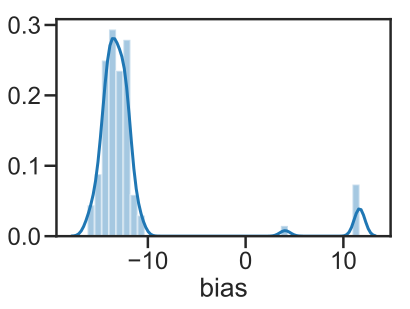

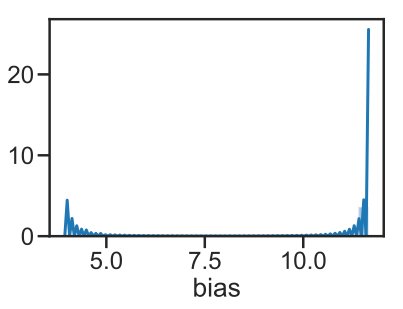

In [6]:
sns.distplot(df.loc[(df['sep_round']==23.3) & (df['kappas_E']==300), 'bias'])
plt.show()
sns.distplot(df.loc[(df['sep_round']==23.3) & (df['kappas_E']==225) & (df['bias']>0), 'bias'], bins=30)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


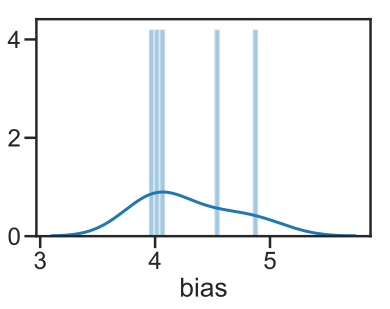

In [22]:
sns.distplot(df.loc[(df['sep_round']==23.3) & (df['kappas_E']==225) & (df['bias']>0) &  (df['bias']<10), 'bias'], bins=20)

In [23]:
df['sep_round'].unique()

array([240. , 208.7, 184.6, 165.6, 150. , 137.2, 126.4, 117.1, 109.1,
       102.2,  96. ,  90.6,  85.8,  81.4,  77.5,  73.9,  70.6,  67.6,
        64.9,  62.4,  57.9,  54. ,  52.2,  50.6,  49. ,  47.6,  46.2,
        44.9,  43.7,  42.5,  41.4,  39.4,  38.4,  37.5,  36.7,  35.8,
        35.1,  34.3,  33.6,  32.9,  32.2,  31.6,  30.4,  29.8,  28.8,
        28.3,  27.8,  27.3,  26.8,  26. ,  25.5,  25.1,  24.8,  24. ,
        23.7,  23.3,  23. ,  22.7,  22. ,  21.7,  21.4,  21.2,  20.9,
        20.6,  20.4,  20.1,  19.8,  19.6,  19.4,  19.1,  18.9,  18.7,
        18.5,  18.3,  18.1,  17.9,  17.7,  17.5,  17.3,  17.1,  16.9,
        16.7,  16.6,  16.4,  16.2,  16.1,  15.9,  15.7,  15.6,  15.4,
        15.3,  15.2,  15. ,  14.9,  14.7,  14.6,  14.5,  14.3,  14.2,
        14.1,  14. ,  13.8,  13.7,  13.6,  13.5,  13.4,  13.3,  13.2,
        13.1,  12.9,  12.8,  12.7,  12.6,  12.5,  12.4,  12.3,  12.2,
        12.1,  12. ,  11.9,  11.8,  11.7,  11.6,  11.5,  11.4,  11.3,
        11.2,  11.1,

In [27]:
df.loc[(df['sep_round']>21) & (df['sep_round']<23) & (df['kappas_E']==225) & (df['bias']>0) &  (df['bias']<10), 'bias'].unique()

array([4.17585725, 4.52367791, 4.01330886, 3.62750948, 4.09148561,
       5.22780844, 4.0534225 , 4.22998307, 4.14562389, 4.54999699,
       3.7545236 , 1.92436489, 3.96642665, 3.66713827, 4.0058367 ,
       3.41651922, 3.69529447, 4.07084087, 3.69568345, 4.38060337,
       3.85324434, 3.87377135, 3.51252716, 4.10725966, 4.42909561,
       3.82100367, 3.91590886, 3.76947095, 3.79094021, 4.71689947,
       3.63633281, 4.22182579, 4.51605766, 2.8034761 ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


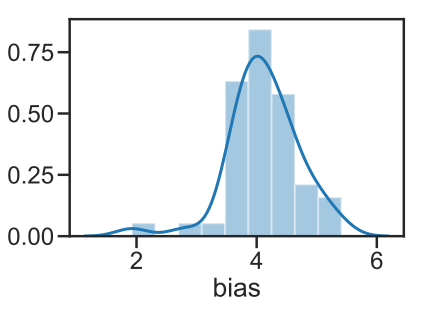

In [31]:
sns.distplot(df.loc[(df['sep_round']>21) & (df['sep_round']<24) & (df['kappas_E']==225) & (df['bias']>0) &  (df['bias']<10), 'bias'])

In [127]:
df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==225)]

bias  kappas_E  kappas_I  separation  success  sep_round
15017 -4.329061       225        15   67.641866     True       67.6
15019 -6.020311       225        15   62.372093     True       62.4
15020 -3.404284       225        15   60.033576     True       60.0
15167 -2.455368       225        15   67.641866     True       67.6
15168 -4.096675       225        15   64.900181     True       64.9
15169 -4.543525       225        15   62.372093     True       62.4
15319 -5.694309       225        15   62.372093     True       62.4
15320 -6.729438       225        15   60.033576     True       60.0
15467 -4.974783       225        15   67.641866     True       67.6
15468 -6.034012       225        15   64.900181     True       64.9
15469 -7.040062       225        15   62.372093     True       62.4
15470 -7.432467       225        15   60.033576     True       60.0
15618 -5.080337       225        15   64.900181     True       64.9
15620 -6.114875       225        15   60.033576     True       60.0
15767 -1.989024       225        15   67.641866     True       67.6
15768 -5.656155       225        15   64.900181     True       64.9
15769 -5.197556       225        15   62.372093     True       62.4
15770 -6.735283       225        15   60.033576     True       60.0
15917 -4.418050       225        15   67.641866     True       67.6
15918 -2.930038       225        15   64.900181     True       64.9
15919 -8.602072       225        15   62.372093     True       62.4
15920 -7.838652       225        15   60.033576     True       60.0
16067 -5.587126       225        15   67.641866     True       67.6
16068 -3.562012       225        15   64.900181     True       64.9
16069 -5.487228       225        15   62.372093     True       62.4
16070 -8.966235       225        15   60.033576     True       60.0
16217 -2.528245       225        15   67.641866     True       67.6
16218 -3.861605       225        15   64.900181     True       64.9
16219 -6.016173       225        15   62.372093     True       62.4
16220 -4.785926       225        15   60.033576     True       60.0
...         ...       ...       ...         ...      ...        ...
28368 -2.015707       225        15   64.900181     True       64.9
28369 -7.212194       225        15   62.372093     True       62.4
28370 -9.357825       225        15   60.033576     True       60.0
28518 -3.370074       225        15   64.900181     True       64.9
28519 -5.369084       225        15   62.372093     True       62.4
28667 -6.724847       225        15   67.641866     True       67.6
28669 -4.769098       225        15   62.372093     True       62.4
28670 -6.525581       225        15   60.033576     True       60.0
28817 -4.458390       225        15   67.641866     True       67.6
28819 -5.223159       225        15   62.372093     True       62.4
28820 -7.699423       225        15   60.033576     True       60.0
28967 -2.304988       225        15   67.641866     True       67.6
28969 -8.346399       225        15   62.372093     True       62.4
29267 -4.569946       225        15   67.641866     True       67.6
29268 -5.867077       225        15   64.900181     True       64.9
29269 -6.587260       225        15   62.372093     True       62.4
29270 -7.539563       225        15   60.033576     True       60.0
29417 -4.173462       225        15   67.641866     True       67.6
29418 -5.209753       225        15   64.900181     True       64.9
29419 -4.710977       225        15   62.372093     True       62.4
29420 -8.440130       225        15   60.033576     True       60.0
29567 -5.283586       225        15   67.641866     True       67.6
29568 -5.931168       225        15   64.900181     True       64.9
29569 -6.289259       225        15   62.372093     True       62.4
29570 -6.965020       225        15   60.033576     True       60.0
29717 -4.355499       225        15   67.641866     True       67.6
29719 -3.120673       225        15   62.372093     True       62.4

-5.381488691787507
-0.5513992990140573


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


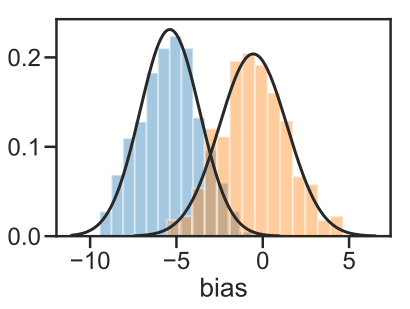

In [118]:
sns.distplot(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==225), 'bias'], kde=None, fit=norm)
sns.distplot(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==300), 'bias'], kde=None, fit=norm)

print(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==225), 'bias'].mean() )
print(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==300), 'bias'].mean() )



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


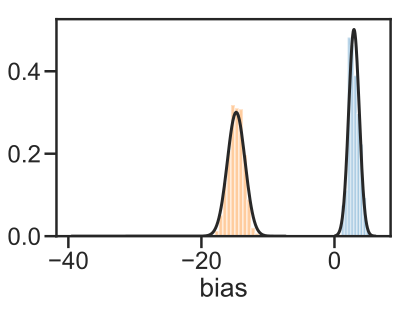

In [98]:
from scipy.stats import norm

sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==225)  & (df['bias']>0)  & (df['bias']<7), 'bias'], kde=None, fit=norm)
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==300)  & (df['bias']<0), 'bias'], kde=None, fit=norm)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


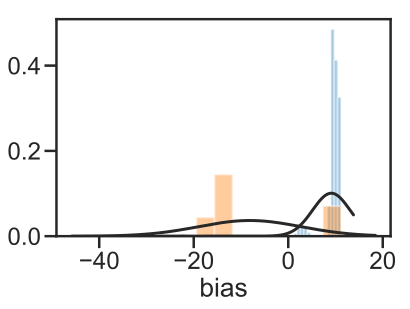

In [99]:
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==225) , 'bias'], kde=None, fit=norm)
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==300) , 'bias'], kde=None, fit=norm)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


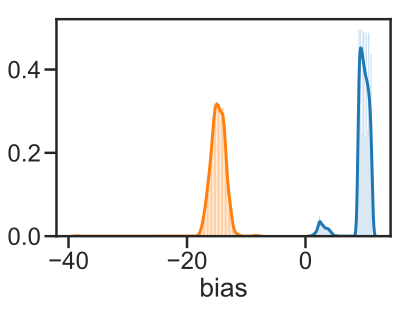

In [85]:
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==225)  & (df['bias']>0), 'bias'])
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==300)  & (df['bias']<0)  , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


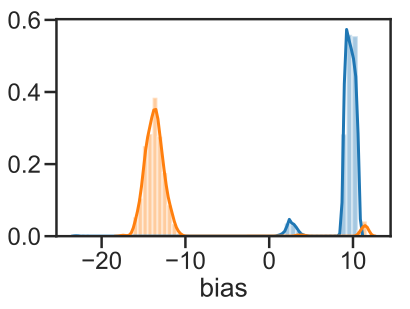

In [70]:
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<21.4) & (df['kappas_E']==225), 'bias'])
sns.distplot(df.loc[(df['sep_round']>21.7) & (df['sep_round']<23.7) & (df['kappas_E']==300) , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


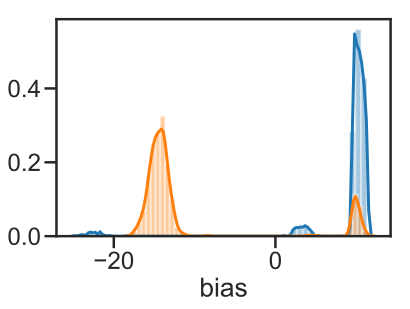

In [79]:
sns.distplot(df.loc[(df['separation']>19) & (df['sep_round']<23) & (df['kappas_E']==225), 'bias'])
sns.distplot(df.loc[(df['separation']>19) & (df['sep_round']<23) & (df['kappas_E']==300) , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


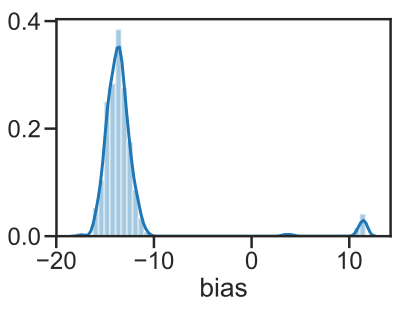

In [67]:
sns.distplot(df.loc[(df['sep_round']>21.7) & (df['sep_round']<23.7) & (df['kappas_E']==300) , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


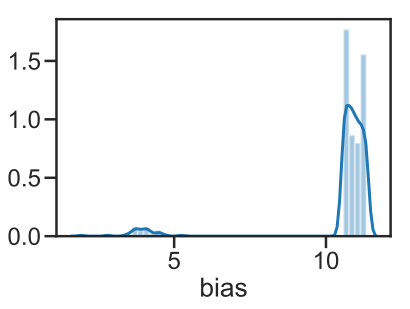

In [30]:
sns.distplot(df.loc[(df['sep_round']>21) & (df['sep_round']<23) & (df['kappas_E']==225) & (df['bias']>0), 'bias'])

In [7]:
df['separation'].max()

240.0

Plot the whole spectrum

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


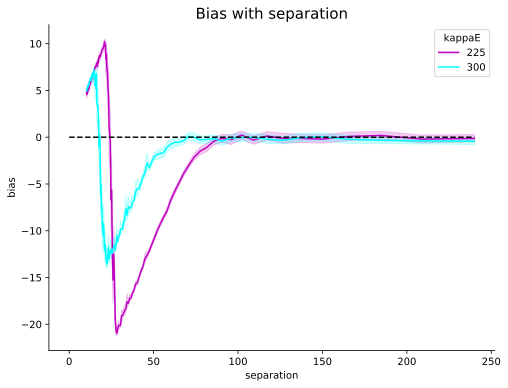

In [4]:
plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.show(block=False)


### 1 bump drift

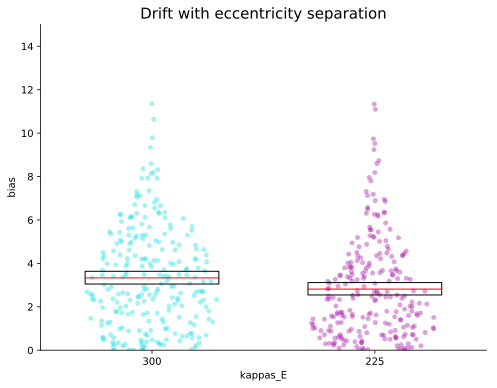

In [5]:
df1_corr = df_1_b.loc[df_1_b['success']==True] ### remove the wrong ones
df1_corr = df1_corr.loc[df1_corr['n_bumps']==1] ### keep the ones with one bump
df1_corr =df1_corr.loc[df1_corr['bias']<50] ### remove extreme cases

plt.figure(figsize=(8,6)) ## plot linares
linares_plot( x="kappas_E", y="bias", order=[300, 225],  palette=['cyan', 'm'], alpha=0.4, point_size=5, df=df1_corr) 
plt.title('Drift with eccentricity separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(0, 15)
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


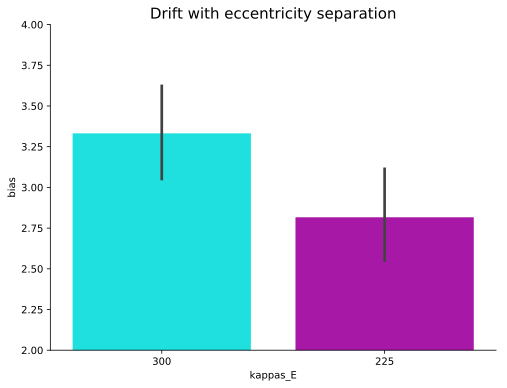

In [9]:
df1_corr = df_1_b.loc[df_1_b['success']==True] ### remove the wrong ones
df1_corr = df1_corr.loc[df1_corr['n_bumps']==1] ### keep the ones with one bump
df1_corr =df1_corr.loc[df1_corr['bias']<50] ### remove extreme cases

plt.figure(figsize=(8,6)) ## plot linares
sns.barplot( x="kappas_E", y="bias", order=[300, 225],  palette=['cyan', 'm'], ci=95, data=df1_corr) 
plt.title('Drift with eccentricity separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(2, 4)
plt.show(block=False)

#### Liniar regression (More angle error closer to center (higer kappa_E)
This happens because the bump is "thicker", so it drifts less due to noise.

In [30]:
res_m = smf.ols(formula='bias ~ kappas_E', data=df1_corr).fit()
print(res_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   bias   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.072
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0141
Time:                        12:19:26   Log-Likelihood:                -1086.2
No. Observations:                 483   AIC:                             2176.
Df Residuals:                     481   BIC:                             2185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2703      0.741      1.713      0.0

### Codes for the simulations

2 bumps interference

In [ ]:
# from model import *
# from joblib import Parallel, delayed
# import multiprocessing

# numcores = multiprocessing.cpu_count() ## run in paralel, in the cluster use all the cores available (for simulations)
# distances_test =  list(np.linspace(1.5, 35, 150))  #range(2,35)   

# kappa_e_test = [ 300, 225] 
# kappa_i_test = [ 30, 15]      

# rep_dist = 100

# n_kappas= len(kappa_e_test) # len of kappas 
# n_sepa = len(distances_test)

# separations= distances_test * rep_dist * n_kappas

# kappas_e=[]
# kappas_i=[]

# for idx, k in enumerate(kappa_e_test):
#     kappas_e = kappas_e + [k]*n_sepa*rep_dist
#     kappas_i = kappas_i + [kappa_i_test[idx]]*n_sepa*rep_dist


# results = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset=100,  presentation_period=350, separation=sep, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5,
#  GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.0, sigI=1.6, kappa_E=kape, kappa_I=kapi, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for sep, kape, kapi in zip(separations, kappas_e, kappas_i)) 

# biases = [results[i][0] for i in range(len(results))]
# separationts = [results[i][1] for i in range(len(results))]   
# kappas__e = [results[i][2] for i in range(len(results))]      
# kappas__i = [results[i][3] for i in range(len(results))]                                                         
# succs = [results[i][6] for i in range(len(results))]   


# df=pd.DataFrame({'bias':biases, 'separation':separationts, 'kappas_E':kappas__e, 'kappas_I':kappas__i, 'success':succs })
# ### df.to_excel('/home/david/Desktop/2_bumps_interference.xlsx')

1 bump angle error (drift)

In [ ]:
# kappa_e_test = [ 300, 225] 
# kappa_i_test = [ 30, 15] 

# rep_dist = 250
# n_kappas= len(kappa_e_test)

# kappas_e=[]
# kappas_i=[]

# for idx, k in enumerate(kappa_e_test):
#     kappas_e = kappas_e + [k]*rep_dist
#     kappas_i = kappas_i + [kappa_i_test[idx]]*rep_dist


# results2 = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset=100,  presentation_period=350, separation=0, tauE=9, tauI=4,  n_stims=1, I0E=0.1, I0I=0.5,
#  GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1, sigI=1.6, kappa_E=kape, kappa_I=kapi, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for kape, kapi in zip( kappas_e, kappas_i)) 

# biases = [results2[i][0] for i in range(len(results2))]
# separationts = [results2[i][1] for i in range(len(results2))]   
# kappas__e = [results2[i][2] for i in range(len(results2))]      
# kappas__i = [results2[i][3] for i in range(len(results2))]                                                         
# succs = [results2[i][6] for i in range(len(results2))]   
# num_bumps = [results2[i][-1] for i in range(len(results2))]  


# df1=pd.DataFrame({'bias':biases, 'kappas_E':kappas__e, 'kappas_I':kappas__i, 'success':succs, 'n_bumps':num_bumps })
# ### df1.to_excel('/home/david/Desktop/1_bump_drift.xlsx')
